# Retention Modeling at Scholastic Travel Company (A)

La problematica requiere de crear un modelo de retención de clientes efectivo que pueda predecir cuáles clientes es probable que reserven nuevamente con STC en el próximo año escolar.

Especificamente saber cuáles clientes reservarán con Scholastic Travel Company (STC) en el año escolar 2013-14 (otoño 2013 a primavera 2014), basándose en los datos disponibles hasta la primavera de 2013.

Esto significa que, para entrenar el modelo, se usará los datos del año escolar 2012-13, que muestran si se ha mantenido o no un cierto grupo, y se intentará predecir en base a la información del perfil del cliente hasta el final del año escolar 2011-12.

Este modelo será utilizado para informar y optimizar la estrategia de marketing de la compañía.



## Importar (libreria & Base de datos)

Se ha importado la biblioteca de librerías necesarias

In [752]:
#Importamos todas las librerias que nos pueden ser de utilidad
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import preprocessing
from scipy import stats
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
!pip install pandas openpyxl
!pip install scikit-learn
!pip install lifetimes

Se ha cargado la base de datos utilizando Pandas

In [753]:
url81 = 'https://drive.google.com/u/0/uc?id=1JiLgQkf1E9XAQGrn5hAJIb1Qa2Mt7fw_&export=download'
data81 = pd.read_excel(url81, sheet_name='Exhibit 1 -- Data', engine='openpyxl')
data81

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0.0,1.0,A,2011-01-14,2011-01-14,...,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
1,2,HC,8.0,8.0,AZ,0.0,7.0,A,2011-01-14,2011-01-21,...,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
2,3,HD,8.0,8.0,FL,0.0,3.0,A,2011-01-15,2011-01-17,...,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
3,4,HN,9.0,12.0,VA,1.0,3.0,B,2011-01-15,2011-01-17,...,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,1.000000,0.0,NaN,0.0
4,5,HD,6.0,8.0,FL,0.0,6.0,T,2011-01-16,2011-01-21,...,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,2388,HS,4.0,4.0,CA,0.0,1.0,A,2011-06-30,2011-06-30,...,Undefined,Undefined,Undefined->Undefined,H,1.0,NaN,0.941176,1.0,NaN,1.0
2388,2389,HD,8.0,8.0,WA,0.0,6.0,A,2011-06-30,2011-07-05,...,Middle,Middle,Middle->Middle,H,1.0,0.027711,0.884615,3.0,L,1.0
2389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A continuación, se realiza un análisis exploratorio de los datos. Se muestran las columnas presentes en el conjunto de datos utilizando la variable "columnas". Luego, se muestra la forma de los datos, que indica que hay 2392 filas y 56 columnas en total.

## Analisis Exploratorio

### Visualización de los datos

#### Identificar columnas

In [754]:
columnas = data81.columns
print(columnas)

Index(['ID', 'Program.Code', 'From.Grade', 'To.Grade', 'Group.State',
       'Is.Non.Annual.', 'Days', 'Travel.Type', 'Departure.Date',
       'Return.Date', 'Deposit.Date', 'Special.Pay', 'Tuition', 'FRP.Active',
       'FRP.Cancelled', 'FRP.Take.up.percent.', 'Early.RPL', 'Latest.RPL',
       'Cancelled.Pax', 'Total.Discount.Pax', 'Initial.System.Date',
       'Poverty.Code', 'Region', 'CRM.Segment', 'School.Type',
       'Parent.Meeting.Flag', 'MDR.Low.Grade', 'MDR.High.Grade',
       'Total.School.Enrollment', 'Income.Level', 'EZ.Pay.Take.Up.Rate',
       'School.Sponsor', 'SPR.Product.Type', 'SPR.New.Existing', 'FPP',
       'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents',
       'FirstMeeting', 'LastMeeting', 'DifferenceTraveltoFirstMeeting',
       'DifferenceTraveltoLastMeeting', 'SchoolGradeTypeLow',
       'SchoolGradeTypeHigh', 'SchoolGradeType', 'DepartureMonth',
       'GroupGradeTypeLow', 'GroupGradeTypeHigh', 'GroupGradeType',
       'MajorProgramCode', '

 Se identifican las variables numéricas y categóricas presentes en el conjunto de datos. Las variables numéricas se identifican con el tipo de datos "float64" o "datetime64", mientras que las variables categóricas se identifican con el tipo de datos "object".

#### Total de variables

Después de realizar el análisis exploratorio de los datos, se realizó una composición de los datos utilizando el método .info() de Pandas. El resultado muestra que el conjunto de datos tiene un total de 2392 filas y 56 columnas. También se muestra información sobre el tipo de datos de cada columna.

In [755]:
data81.shape

(2392, 56)

#### Identificar variables numericas y categoricas

In [756]:
print(data81.dtypes)

ID                                        object
Program.Code                              object
From.Grade                               float64
To.Grade                                 float64
Group.State                               object
Is.Non.Annual.                           float64
Days                                     float64
Travel.Type                               object
Departure.Date                    datetime64[ns]
Return.Date                       datetime64[ns]
Deposit.Date                      datetime64[ns]
Special.Pay                               object
Tuition                                  float64
FRP.Active                               float64
FRP.Cancelled                            float64
FRP.Take.up.percent.                     float64
Early.RPL                         datetime64[ns]
Latest.RPL                        datetime64[ns]
Cancelled.Pax                            float64
Total.Discount.Pax                       float64
Initial.System.Date 

#### Composicion de los datos

In [757]:
data81.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              2390 non-null   object        
 1   Program.Code                    2389 non-null   object        
 2   From.Grade                      2262 non-null   float64       
 3   To.Grade                        2239 non-null   float64       
 4   Group.State                     2389 non-null   object        
 5   Is.Non.Annual.                  2389 non-null   float64       
 6   Days                            2389 non-null   float64       
 7   Travel.Type                     2389 non-null   object        
 8   Departure.Date                  2389 non-null   datetime64[ns]
 9   Return.Date                     2389 non-null   datetime64[ns]
 10  Deposit.Date                    2389 non-null   datetime64[ns]
 11  Spec

#### Identificar los valores perdidos

In [758]:
data81.isnull().sum()

ID                                   2
Program.Code                         3
From.Grade                         130
To.Grade                           153
Group.State                          3
Is.Non.Annual.                       3
Days                                 3
Travel.Type                          3
Departure.Date                       3
Return.Date                          3
Deposit.Date                         3
Special.Pay                       1922
Tuition                              3
FRP.Active                           3
FRP.Cancelled                        3
FRP.Take.up.percent.                 3
Early.RPL                          676
Latest.RPL                          22
Cancelled.Pax                        3
Total.Discount.Pax                   3
Initial.System.Date                 11
Poverty.Code                       602
Region                               3
CRM.Segment                          7
School.Type                          3
Parent.Meeting.Flag      

Además, se identificaron los valores perdidos en el conjunto de datos utilizando el método .isnull().sum(). Se muestra la cantidad de valores perdidos en cada columna. Algunas columnas tienen un número significativo de valores perdidos, como "Special.Pay" con 1922 valores perdidos, "Early.RPL" con 676 valores perdidos y "FirstMeeting" con 340 valores perdidos.

<Axes: >

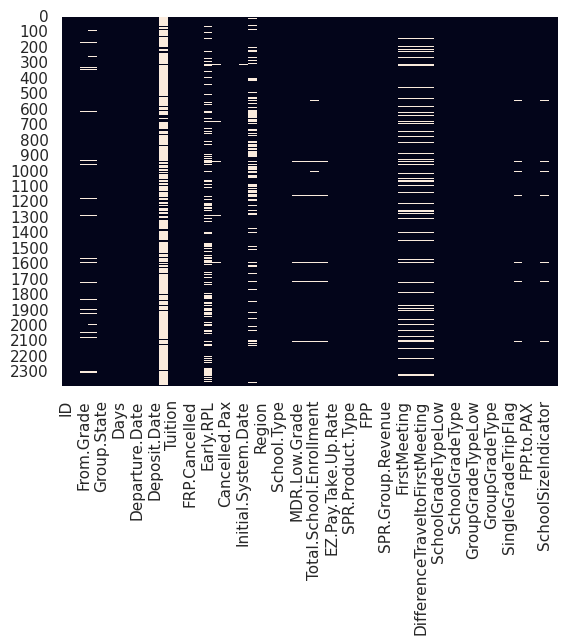

In [759]:
sns.heatmap(data81.isnull(), cbar=False)

Para visualizar los valores perdidos, se creó un mapa de calor utilizando Seaborn con la función sns.heatmap(). El mapa de calor muestra en color las celdas donde se encuentran los valores perdidos en el conjunto de datos.

El análisis de los valores perdidos es importante para determinar si se necesitan estrategias de imputación o eliminación de filas o columnas para tratar los datos faltantes antes de continuar con el modelado de retención de clientes.

#### Distribución de variables

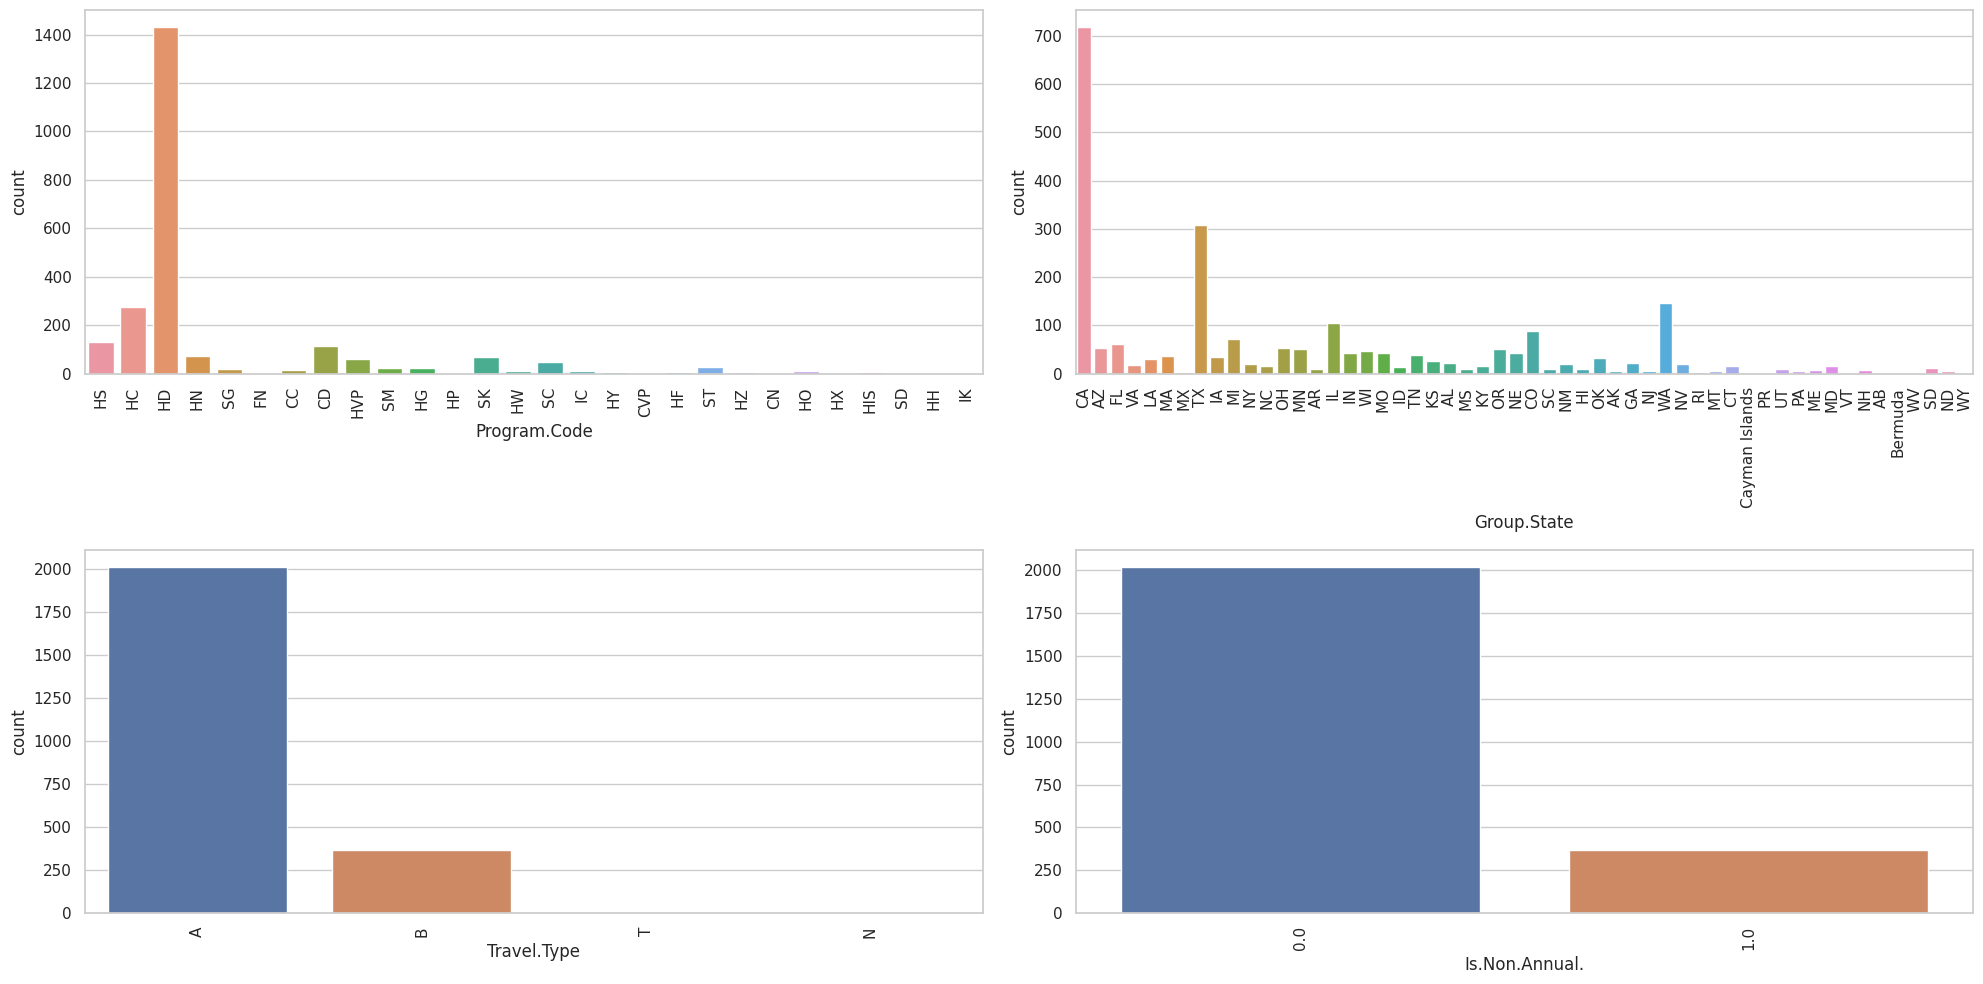

In [760]:
categorical_vars = ['Program.Code', 'Group.State', 'Travel.Type', 'Is.Non.Annual.']
numerical_vars = ['From.Grade', 'To.Grade', 'Days']

data_categorical = data81[categorical_vars]
data_numerical = data81[numerical_vars]

# Crear figuras con subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

# Crear un countplot para cada variable categórica
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=data_categorical, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Ajustar espacio entre subplots
fig.tight_layout()

# Mostrar el plot
plt.show()

Se realizó un análisis de la distribución de variables en el conjunto de datos. Primero, se seleccionaron las variables categóricas 'Program.Code', 'Group.State', 'Travel.Type' y 'Is.Non.Annual.' para mostrar la cantidad de ocurrencias de cada categoría utilizando gráficos de barras. Se creó un subplot de 2x2 para mostrar cada gráfico por separado.

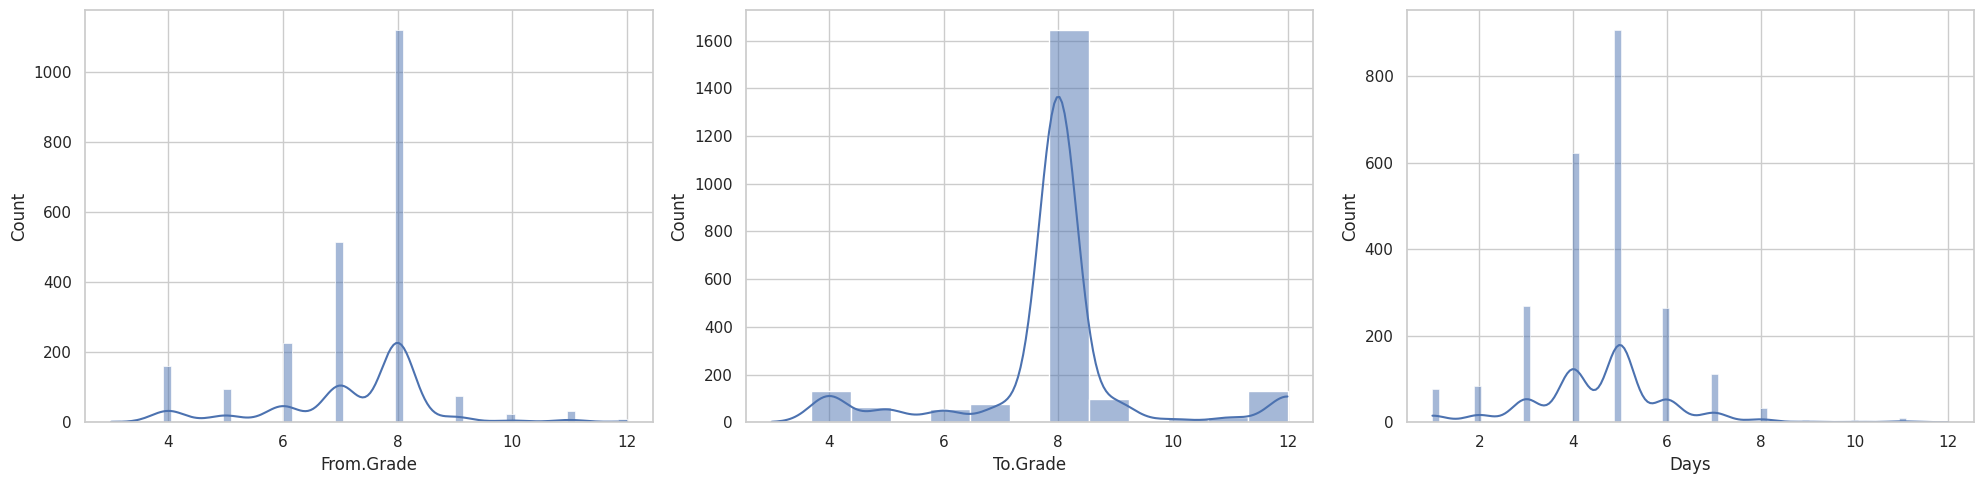

In [761]:
# Crear figuras con subplots para histogramas y diagramas de cajas
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axs = axs.flatten()

# Crear histogramas para cada variable numérica
for i, var in enumerate(numerical_vars):
    sns.histplot(data=data_numerical, x=var, ax=axs[i], kde=True)

fig.tight_layout()
plt.show()

Luego, se seleccionaron las variables numéricas 'From.Grade', 'To.Grade' y 'Days'. Se crearon histogramas para visualizar la distribución de cada variable numérica. Los histogramas incluyen una estimación de densidad kernel (KDE) para mostrar la forma de la distribución.

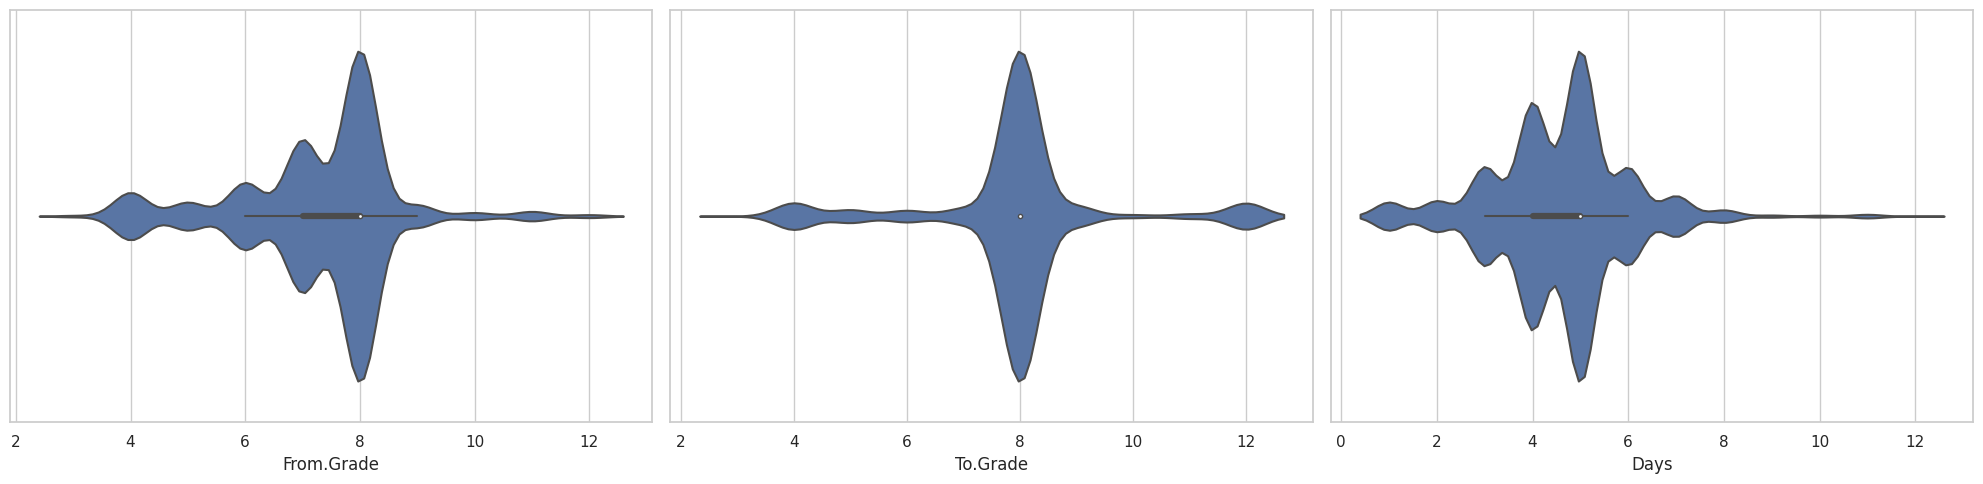

In [762]:
  fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axs = axs.flatten()

for i, var in enumerate(numerical_vars):
    sns.violinplot(x=var, data=data_numerical, ax=axs[i])

fig.tight_layout()
plt.show()

Además, se utilizaron diagramas de violín para visualizar la distribución de las variables numéricas. Los diagramas de violín muestran la distribución de los datos a lo largo de un eje vertical y también incluyen una estimación de densidad kernel.

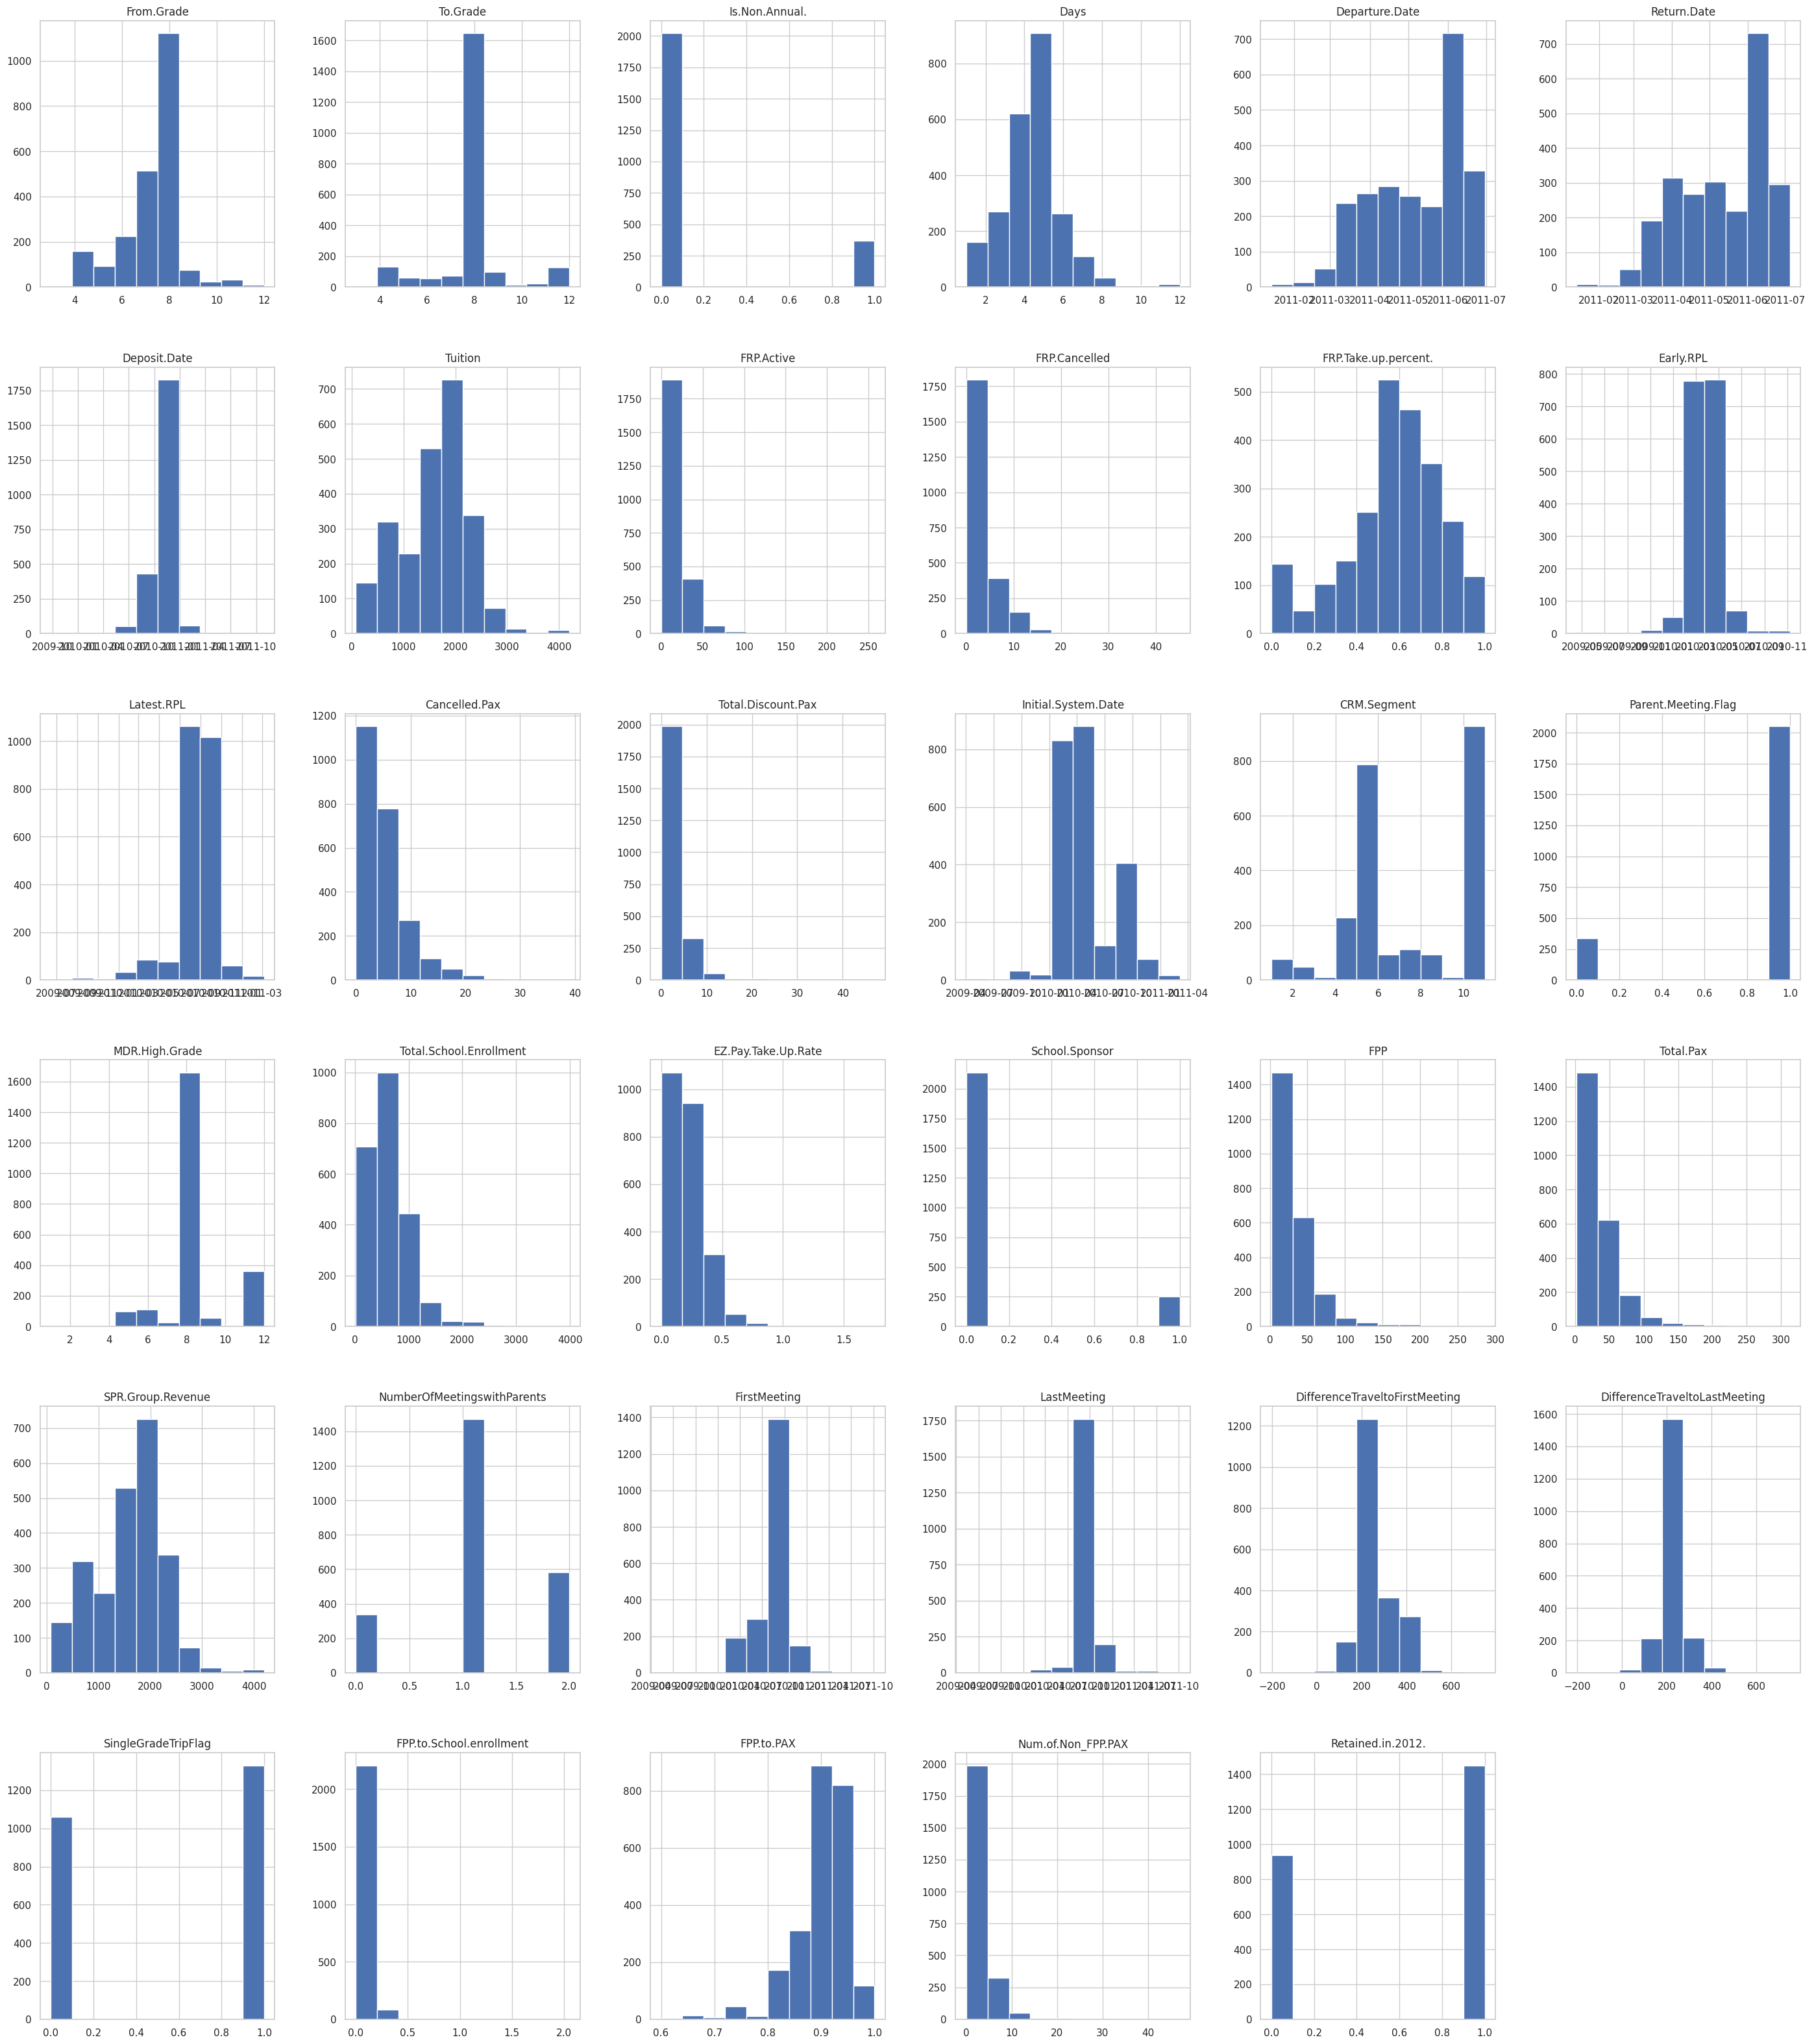

In [763]:
data81.hist(figsize=(35, 40))
plt.show()

También se mostró un histograma para cada variable numérica utilizando la función hist() de Pandas. La figura tiene un tamaño grande para mostrar claramente la distribución de cada variable numérica.

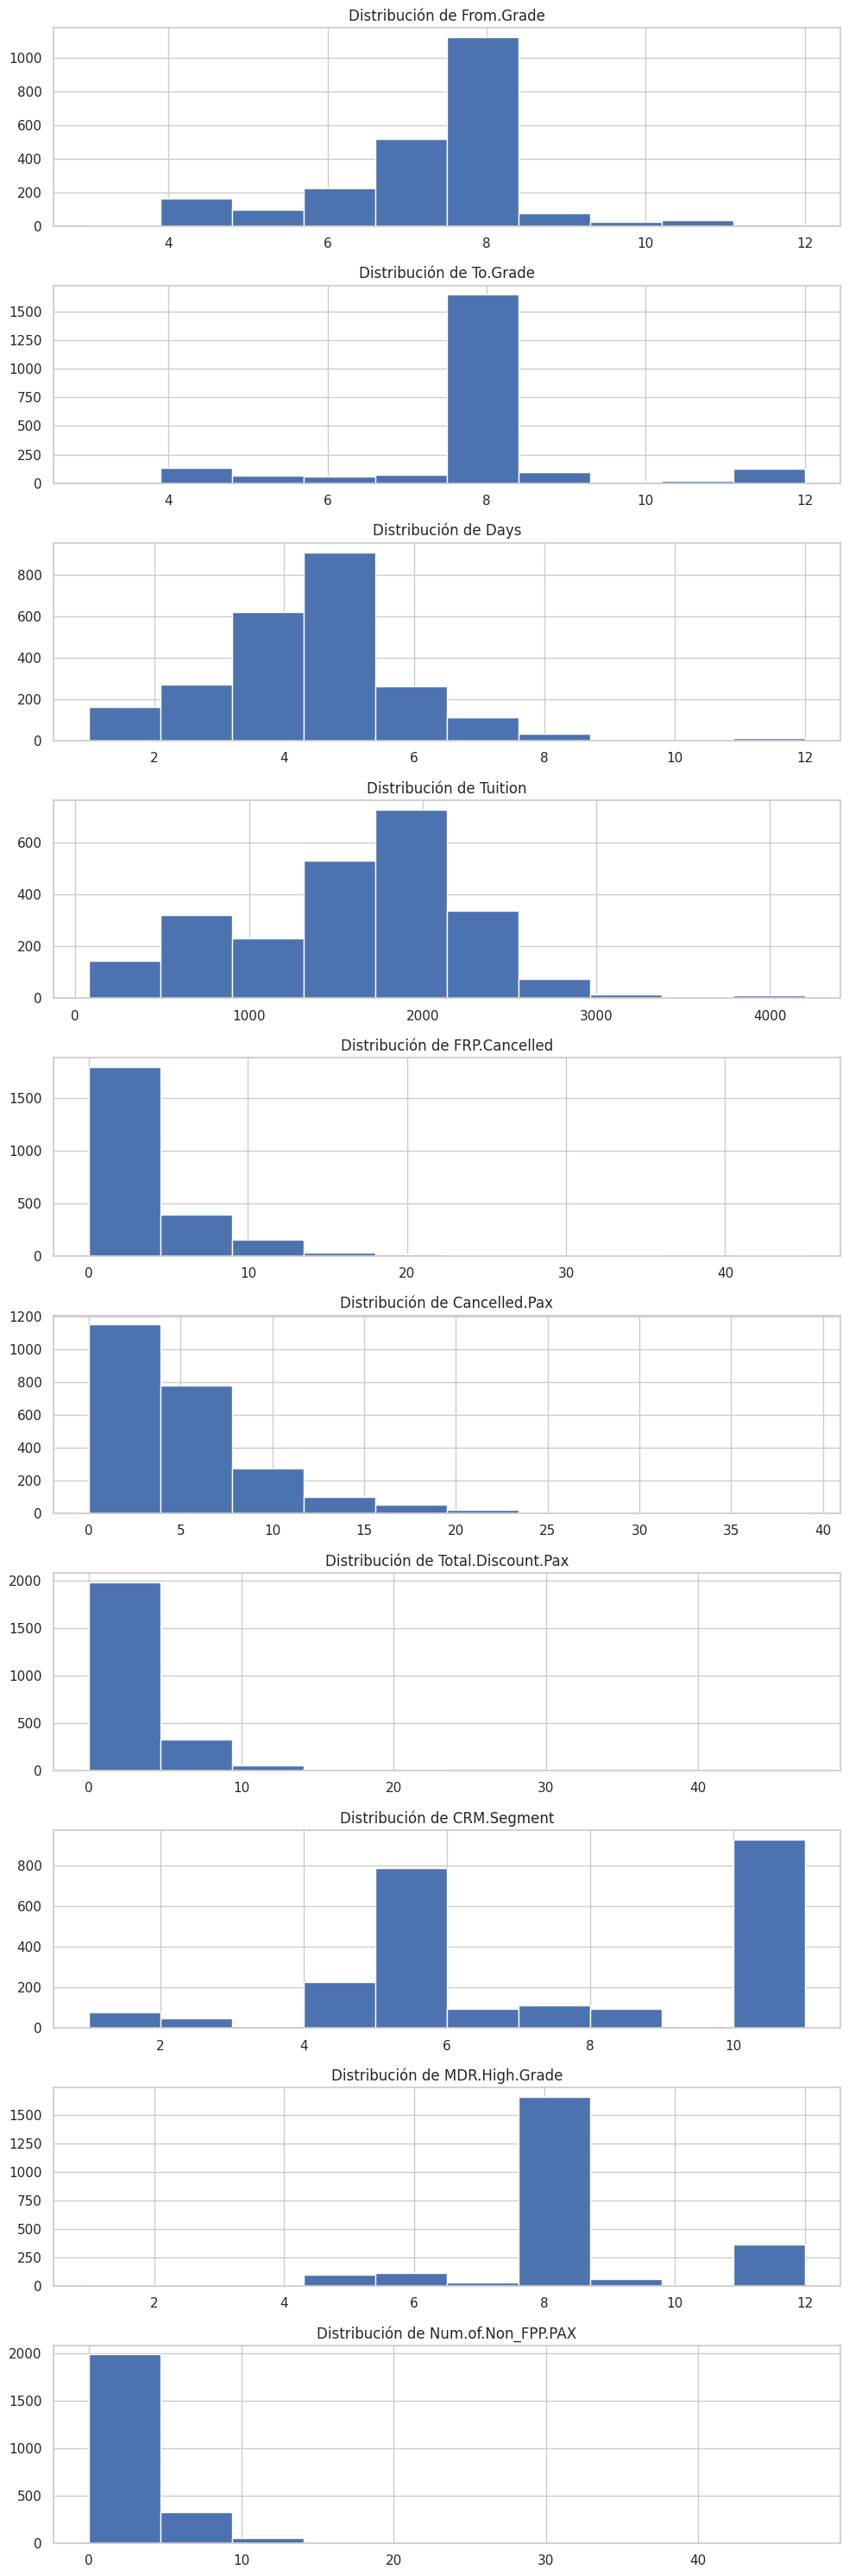

In [764]:
variables_numericas = ['From.Grade', 'To.Grade', 'Days', 'Tuition', 'FRP.Cancelled',
                      'Cancelled.Pax', 'Total.Discount.Pax', 'CRM.Segment', 'MDR.High.Grade',
                       'Num.of.Non_FPP.PAX']

fig, axs = plt.subplots(nrows=len(variables_numericas), figsize=(10, 30))

for i, var in enumerate(variables_numericas):
    axs[i].hist(data81[var])
    axs[i].set_title(f'Distribución de {var}')

plt.tight_layout()
plt.show()

se seleccionaron algunas variables numéricas específicas y se crearon histogramas individuales para cada una. Esto permite examinar más de cerca la distribución de estas variables en particular.

El análisis de la distribución de variables es útil para comprender la naturaleza de los datos y determinar si es necesario realizar transformaciones o tomar medidas para abordar valores atípicos o sesgos en los datos antes de continuar con el modelado de retención de clientes.

### Estadísticas descriptivas:

#### Resumen estadístico del DataFrame

In [765]:
data81.describe()

,From.Grade,To.Grade,Is.Non.Annual.,Days,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Cancelled.Pax,Total.Discount.Pax,...,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,Retained.in.2012.
count,2262.000000,2239.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,...,2389.000000,2389.000000,2389.000000,2052.000000,2052.000000,2389.000000,2298.000000,2389.000000,2389.000000,2389.000000
mean,7.268347,7.912908,0.154039,4.575136,1615.217664,16.867727,3.305567,0.570743,4.807451,2.953537,...,34.250733,1615.217664,1.102135,262.083821,228.978070,0.556718,0.066184,0.900667,2.953537,0.607367
std,1.388350,1.558226,0.361062,1.432128,645.096047,16.942782,3.677022,0.230666,4.661194,2.876422,...,31.590096,645.096047,0.611544,79.520208,53.636014,0.496877,0.081112,0.049119,2.876422,0.488439
min,3.000000,3.000000,0.000000,1.000000,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,79.000000,0.000000,-204.000000,-204.000000,0.000000,0.000922,0.600000,0.000000,0.000000
25%,7.000000,8.000000,0.000000,4.000000,1174.000000,6.000000,1.000000,0.455000,2.000000,1.000000,...,14.000000,1174.000000,1.000000,208.000000,196.750000,0.000000,0.020787,0.882353,1.000000,0.000000
50%,8.000000,8.000000,0.000000,5.000000,1700.000000,12.000000,2.000000,0.600000,4.000000,2.000000,...,26.000000,1700.000000,1.000000,250.000000,233.000000,1.000000,0.045256,0.909091,2.000000,1.000000
75%,8.000000,8.000000,0.000000,5.000000,2048.000000,23.000000,4.000000,0.727000,6.000000,4.000000,...,44.000000,2048.000000,1.000000,287.000000,261.000000,1.000000,0.087517,0.933333,4.000000,1.000000
max,12.000000,12.000000,1.000000,12.000000,4200.000000,257.000000,45.000000,1.000000,39.000000,47.000000,...,313.000000,4200.000000,2.000000,749.000000,749.000000,1.000000,2.052632,1.000000,47.000000,1.000000


Se realizaron diversas estadísticas descriptivas para el DataFrame.

El resumen estadístico del DataFrame proporciona información como el recuento, la media, la desviación estándar, los valores mínimos, los percentiles y los valores máximos para cada variable numérica en el conjunto de datos. Esto nos da una idea de la distribución y la variabilidad de los datos en estas variables.

#### Número de valores distintos en las variables.

In [766]:
unique_counts = data81.nunique().sort_values(ascending=False)
print(unique_counts)


ID                                2390
FPP.to.School.enrollment          1909
Tuition                           1230
SPR.Group.Revenue                 1230
Total.School.Enrollment            893
FRP.Take.up.percent.               476
EZ.Pay.Take.Up.Rate                371
DifferenceTraveltoFirstMeeting     342
FPP.to.PAX                         306
Initial.System.Date                296
DifferenceTraveltoLastMeeting      251
Latest.RPL                         215
FirstMeeting                       207
LastMeeting                        172
Total.Pax                          159
FPP                                146
Departure.Date                     144
Return.Date                        143
Early.RPL                          141
Deposit.Date                       135
FRP.Active                          93
Group.State                         54
Cancelled.Pax                       34
FRP.Cancelled                       29
Program.Code                        28
Total.Discount.Pax       

También se calculó el número de valores distintos en cada variable utilizando la función nunique(). Esto nos muestra la cantidad de categorías únicas en cada variable, lo cual es útil para comprender la variabilidad de las variables categóricas.

### Manejo de datos faltantes

#### Variables con valores nulos

In [767]:
null_columns = data81.isnull().any()
null_columns_sorted = null_columns.sort_values(ascending=False)[:56]
print(null_columns_sorted)

ID                                True
Program.Code                      True
EZ.Pay.Take.Up.Rate               True
School.Sponsor                    True
SPR.Product.Type                  True
SPR.New.Existing                  True
FPP                               True
Total.Pax                         True
SPR.Group.Revenue                 True
NumberOfMeetingswithParents       True
FirstMeeting                      True
LastMeeting                       True
DifferenceTraveltoFirstMeeting    True
DifferenceTraveltoLastMeeting     True
SchoolGradeTypeLow                True
SchoolGradeTypeHigh               True
SchoolGradeType                   True
DepartureMonth                    True
GroupGradeTypeLow                 True
GroupGradeTypeHigh                True
GroupGradeType                    True
MajorProgramCode                  True
SingleGradeTripFlag               True
FPP.to.School.enrollment          True
FPP.to.PAX                        True
Num.of.Non_FPP.PAX       

#### Cantidad de valores nulos

In [768]:
data81.isnull().sum()


ID                                   2
Program.Code                         3
From.Grade                         130
To.Grade                           153
Group.State                          3
Is.Non.Annual.                       3
Days                                 3
Travel.Type                          3
Departure.Date                       3
Return.Date                          3
Deposit.Date                         3
Special.Pay                       1922
Tuition                              3
FRP.Active                           3
FRP.Cancelled                        3
FRP.Take.up.percent.                 3
Early.RPL                          676
Latest.RPL                          22
Cancelled.Pax                        3
Total.Discount.Pax                   3
Initial.System.Date                 11
Poverty.Code                       602
Region                               3
CRM.Segment                          7
School.Type                          3
Parent.Meeting.Flag      

Luego, se identificaron las variables con valores nulos utilizando el método isnull() y se contó la cantidad de valores nulos en cada variable utilizando la función sum(). Esto nos da una idea de la cantidad de datos faltantes en cada variable.

#### Porcentaje de valores nulos

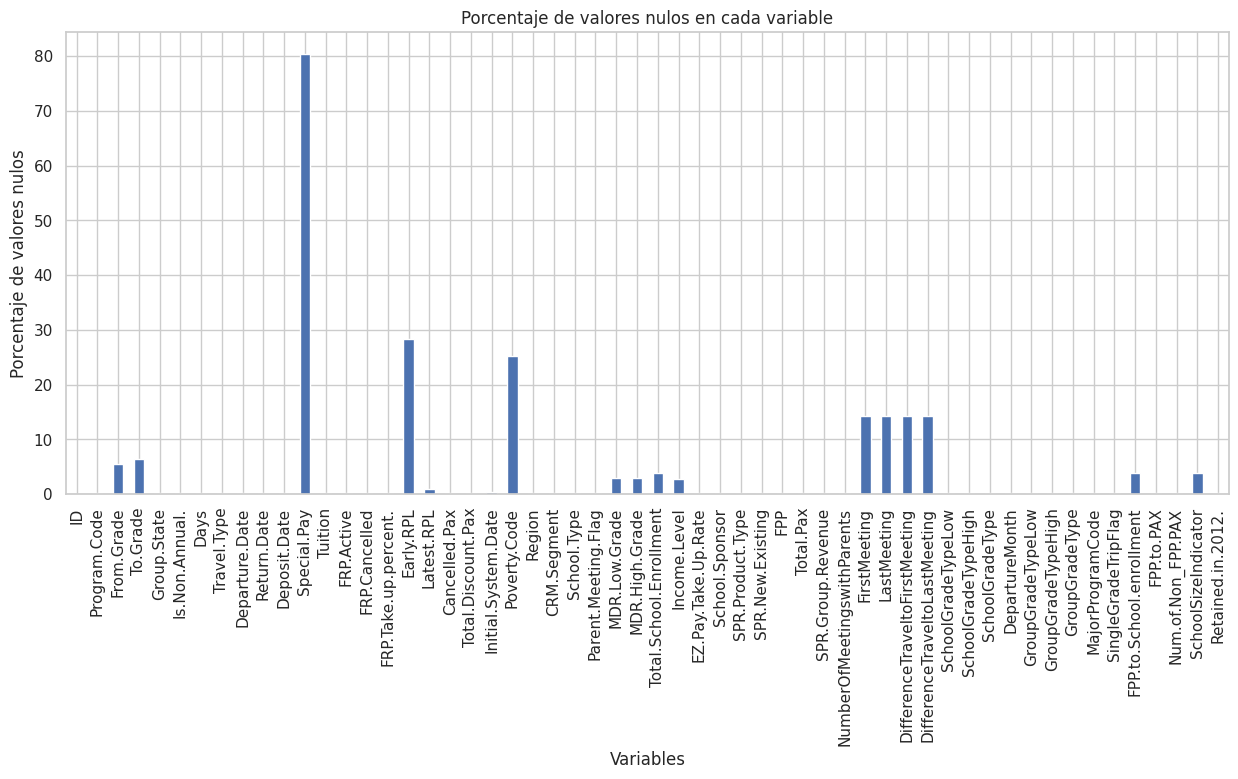

In [769]:
null_percentages = (data81.isnull().sum() / len(data81)) * 100

# Ajustar el tamaño de la figura
plt.figure(figsize=(15, 6))

null_percentages.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Porcentaje de valores nulos')
plt.title('Porcentaje de valores nulos en cada variable')
plt.show()



Además, se calculó el porcentaje de valores nulos en cada variable dividiendo la cantidad de valores nulos por la longitud del DataFrame y multiplicando por 100. Esto nos da una medida del impacto de los valores nulos en cada variable.

Finalmente, se representó gráficamente el porcentaje de valores nulos en cada variable utilizando un gráfico de barras. Esto proporciona una visualización clara de las variables con valores nulos y su magnitud relativa.

El análisis de datos faltantes es importante para comprender la integridad de los datos y determinar si se deben tomar medidas para imputar los valores faltantes o eliminar las observaciones correspondientes antes de realizar el modelado de retención de clientes.

In [770]:

finding=data81[data81['NumberOfMeetingswithParents']==0][['NumberOfMeetingswithParents','DifferenceTraveltoLastMeeting','DifferenceTraveltoFirstMeeting']]
finding.head(5)

,NumberOfMeetingswithParents,DifferenceTraveltoLastMeeting,DifferenceTraveltoFirstMeeting
3,0.0,NaN,NaN
31,0.0,NaN,NaN
32,0.0,NaN,NaN
46,0.0,NaN,NaN
50,0.0,NaN,NaN


 realiza una selección de filas del DataFrame 'data81' donde el valor de la columna 'NumberOfMeetingswithParents' es igual a 0. Luego, selecciona las columnas 'NumberOfMeetingswithParents', 'DifferenceTraveltoLastMeeting' y 'DifferenceTraveltoFirstMeeting' para mostrar los resultados.

El resultado que se muestra a continuación es una vista previa de las primeras cinco filas que cumplen con la condición especificada:

Estas filas tienen un valor de 0 en la columna 'NumberOfMeetingswithParents' y valores faltantes (NaN) en las columnas 'DifferenceTraveltoLastMeeting' y 'DifferenceTraveltoFirstMeeting'.





In [771]:
for var in variables_numericas:
  print("% de valores nulos " + var +": \t "+ "{:,.2f}%".format( data81[var].isnull().sum() / data81.shape[0] *100))

% de valores nulos From.Grade: 	 5.43%
% de valores nulos To.Grade: 	 6.40%
% de valores nulos Days: 	 0.13%
% de valores nulos Tuition: 	 0.13%
% de valores nulos FRP.Cancelled: 	 0.13%
% de valores nulos Cancelled.Pax: 	 0.13%
% de valores nulos Total.Discount.Pax: 	 0.13%
% de valores nulos CRM.Segment: 	 0.29%
% de valores nulos MDR.High.Grade: 	 2.97%
% de valores nulos Num.of.Non_FPP.PAX: 	 0.13%


Porcentaje de valores nulos: Se utilizó un bucle for para calcular el porcentaje de valores nulos en cada variable numérica del DataFrame. Esto se hizo dividiendo la cantidad de valores nulos en una variable entre el número total de filas del DataFrame y luego multiplicándolo por 100. Este porcentaje nos da una idea de la cantidad de datos faltantes en cada variable.

### Análisis de relaciones

#### Matriz de correlación

In [772]:
data81.corr()  # Matriz de correlación

,From.Grade,To.Grade,Is.Non.Annual.,Days,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Cancelled.Pax,Total.Discount.Pax,...,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,Retained.in.2012.
From.Grade,1.000000,0.779775,-0.107391,0.402515,0.313262,0.094622,0.076536,0.133030,0.062403,0.151813,...,0.042538,0.313262,0.089202,-0.032032,-0.040250,0.196779,-0.062839,-0.122717,0.151813,0.083220
To.Grade,0.779775,1.000000,0.092553,0.440916,0.414692,-0.063830,0.029503,0.154540,0.048955,0.014050,...,-0.128152,0.414692,0.134745,0.046226,0.028065,-0.322935,-0.107073,-0.246170,0.014050,-0.200470
Is.Non.Annual.,-0.107391,0.092553,1.000000,0.019720,0.056052,-0.033359,-0.009289,0.061712,-0.020190,-0.060039,...,-0.072043,0.056052,0.063371,0.111056,0.064330,-0.352164,0.075935,0.020026,-0.060039,-0.390633
Days,0.402515,0.440916,0.019720,1.000000,0.772086,-0.037300,0.058620,0.069282,0.052793,-0.001338,...,-0.107127,0.772086,0.127983,0.088838,0.053798,-0.117656,-0.109527,-0.173382,-0.001338,-0.049402
Tuition,0.313262,0.414692,0.056052,0.772086,1.000000,-0.225533,-0.007369,0.175085,-0.026192,-0.218439,...,-0.356411,1.000000,0.153833,0.130842,0.102268,-0.179277,-0.277246,-0.294471,-0.218439,-0.119015
FRP.Active,0.094622,-0.063830,-0.033359,-0.037300,-0.225533,1.000000,0.463491,0.269307,0.383178,0.698390,...,0.815460,-0.225533,0.000334,-0.120211,-0.105919,0.213394,0.393675,0.261698,0.698390,0.250478
FRP.Cancelled,0.076536,0.029503,-0.009289,0.058620,-0.007369,0.463491,1.000000,0.180026,0.850347,0.323035,...,0.343967,-0.007369,0.107907,0.029818,0.027411,0.059500,0.091254,0.045080,0.323035,0.072659
FRP.Take.up.percent.,0.133030,0.154540,0.061712,0.069282,0.175085,0.269307,0.180026,1.000000,0.054446,-0.095357,...,-0.145122,0.175085,0.142427,0.064169,0.072920,-0.063694,-0.148195,-0.113037,-0.095357,-0.016665
Cancelled.Pax,0.062403,0.048955,-0.020190,0.052793,-0.026192,0.383178,0.850347,0.054446,1.000000,0.349456,...,0.359780,-0.026192,0.090051,0.039739,0.047998,0.021533,0.095976,0.029998,0.349456,0.048998
Total.Discount.Pax,0.151813,0.014050,-0.060039,-0.001338,-0.218439,0.698390,0.323035,-0.095357,0.349456,1.000000,...,0.867006,-0.218439,-0.017774,-0.116298,-0.108579,0.185115,0.422004,-0.030479,1.000000,0.216218


Matriz de correlación: Se utilizó el método corr() del DataFrame para calcular la matriz de correlación. Esta matriz muestra las relaciones lineales entre pares de variables numéricas. Cada celda de la matriz contiene el valor de correlación correspondiente, que puede variar entre -1 y 1. Un valor de 1 indica una correlación positiva perfecta, -1 indica una correlación negativa perfecta y 0 indica una falta de correlación.

#### Mapa de correlación

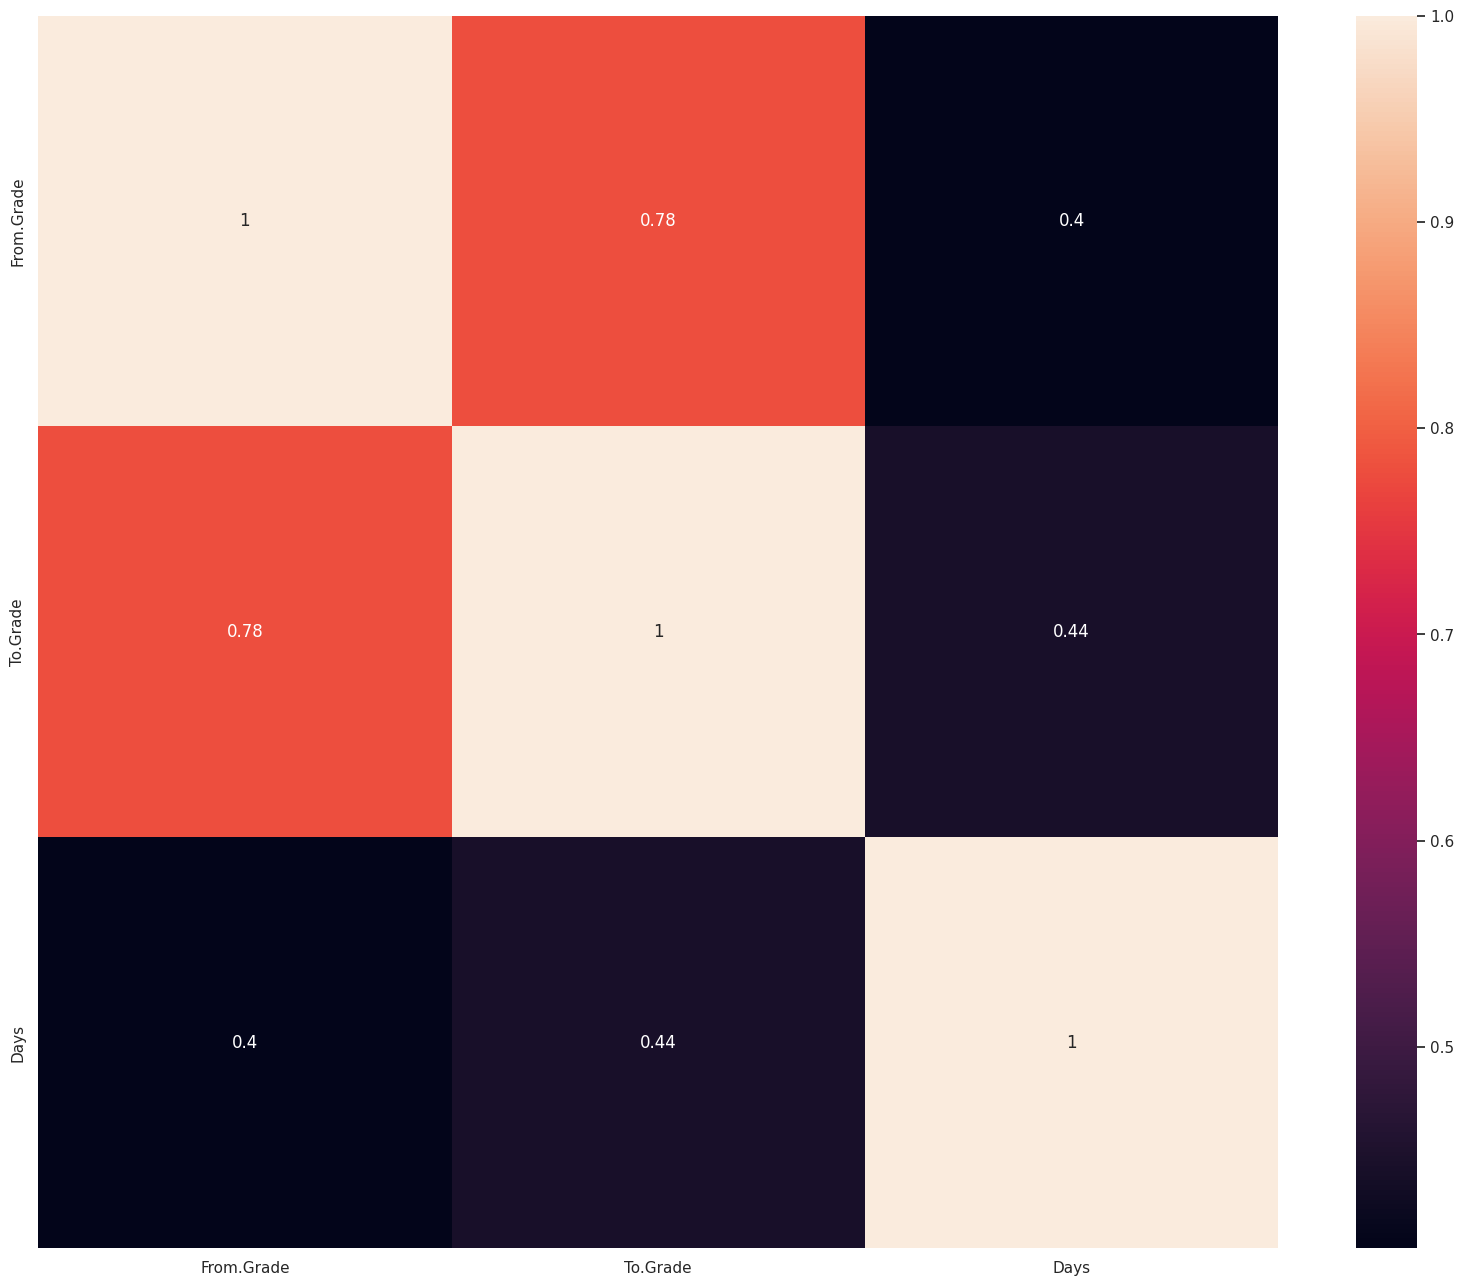

In [773]:
plt.figure(figsize=(20, 16))
sns.heatmap(data_numerical.corr(), fmt='.2g', annot=True)
plt.show()

Mapa de calor: Se utilizó la biblioteca Seaborn y su función heatmap() para crear un mapa de calor que visualiza la matriz de correlación. El mapa de calor utiliza colores para resaltar las relaciones más fuertes entre las variables numéricas. Los colores más oscuros indican una correlación más fuerte, ya sea positiva o negativa, mientras que los colores más claros indican una correlación más débil o nula.

### Segmentación y agregación

In [774]:
grouped_data = data81.groupby('From.Grade')
grouped_data.mean()  # Calcular la media para cada grupo
grouped_data.describe()  # Obtener estadísticas descriptivas para cada grupo


To.Grade                                                      \
              count       mean       std   min    25%   50%   75%   max   
From.Grade                                                                
3.0             5.0   5.800000  1.923538   3.0   5.00   6.0   7.0   8.0   
4.0           160.0   4.237500  0.598609   4.0   4.00   4.0   4.0   8.0   
5.0            92.0   6.065217  1.389160   5.0   5.00   6.0   6.0  12.0   
6.0           224.0   7.933036  1.041721   6.0   8.00   8.0   8.0  12.0   
7.0           512.0   8.062500  0.740233   7.0   8.00   8.0   8.0  12.0   
8.0          1105.0   8.079638  0.430907   8.0   8.00   8.0   8.0  12.0   
9.0            75.0  11.320000  1.152670   9.0  11.00  12.0  12.0  12.0   
10.0           24.0  11.416667  0.717282  10.0  11.00  12.0  12.0  12.0   
11.0           32.0  11.750000  0.439941  11.0  11.75  12.0  12.0  12.0   
12.0           10.0  12.000000  0.000000  12.0  12.00  12.0  12.0  12.0   

           Is.Non.Annual.            ... Num.of.Non_FPP.PAX        \
                    count      mean  ...                75%   max   
From.Grade                           ...                            
3.0                   5.0  0.600000  ...                2.0   2.0   
4.0                 160.0  0.106250  ...                2.0   7.0   
5.0                  94.0  0.244681  ...                3.0   9.0   
6.0                 226.0  0.252212  ...                2.0   8.0   
7.0                 515.0  0.337864  ...                3.0  19.0   
8.0                1121.0  0.049955  ...                4.0  47.0   
9.0                  75.0  0.186667  ...                2.0  11.0   
10.0                 24.0  0.083333  ...                2.0   5.0   
11.0                 32.0  0.343750  ...                4.0  11.0   
12.0                 10.0  0.100000  ...                2.0   4.0   

           Retained.in.2012.                                                
                       count      mean       std  min  25%  50%   75%  max  
From.Grade                                                                  
3.0                      5.0  0.200000  0.447214  0.0  0.0  0.0  0.00  1.0  
4.0                    160.0  0.700000  0.459696  0.0  0.0  1.0  1.00  1.0  
5.0                     94.0  0.510638  0.502567  0.0  0.0  1.0  1.00  1.0  
6.0                    226.0  0.345133  0.476467  0.0  0.0  0.0  1.00  1.0  
7.0                    515.0  0.401942  0.490767  0.0  0.0  0.0  1.00  1.0  
8.0                   1121.0  0.801070  0.399373  0.0  1.0  1.0  1.00  1.0  
9.0                     75.0  0.213333  0.412420  0.0  0.0  0.0  0.00  1.0  
10.0                    24.0  0.208333  0.414851  0.0  0.0  0.0  0.00  1.0  
11.0                    32.0  0.406250  0.498991  0.0  0.0  0.0  1.00  1.0  
12.0                    10.0  0.300000  0.483046  0.0  0.0  0.0  0.75  1.0  

[10 rows x 208 columns]

Segmentación y agregación: Se utilizó el método groupby() del DataFrame para agrupar los datos según la variable "From.Grade". Luego, se calcularon estadísticas descriptivas para cada grupo utilizando el método mean() para obtener la media de cada grupo y el método describe() para obtener estadísticas adicionales, como la desviación estándar, los percentiles mínimo y máximo, y los cuartiles. Esto nos permite analizar las características de cada grupo en función de la variable de segmentación y comprender las diferencias o similitudes entre los grupos.

Estos pasos nos permiten explorar las relaciones entre las variables numéricas, identificar patrones o tendencias y comprender las características de los diferentes grupos en el conjunto de datos. Esto puede proporcionar información valiosa para el análisis y la toma de decisiones posteriores.

### Limpieza

#### Imputar valores faltantes

#### Dropear

In [775]:
data81.drop(['SchoolGradeTypeHigh','SchoolGradeTypeLow','GroupGradeTypeLow','GroupGradeTypeHigh','LastMeeting','FirstMeeting','Return.Date','Early.RPL'], axis=1, inplace = True)

Eliminación de columnas: Se eliminaron las columnas "SchoolGradeTypeHigh", "SchoolGradeTypeLow", "GroupGradeTypeLow", "GroupGradeTypeHigh", "LastMeeting", "FirstMeeting", "Return.Date" y "Early.RPL" del DataFrame utilizando el método drop() con el argumento axis=1. Estas columnas se consideraron irrelevantes o redundantes para el análisis.

In [776]:
data81['Time_travel1']= data81['Departure.Date']-data81['Latest.RPL']

Cálculo de la variable "Time_travel1": Se creó una nueva variable llamada "Time_travel1" que representa la diferencia entre la fecha de partida ("Departure.Date") y la fecha más reciente de la lista de precios ("Latest.RPL"). Esto se hizo restando ambas columnas.

In [777]:
data81.isnull().sum().sort_values(ascending=False).sum()

nulls=data81.isnull().sum().sort_values(ascending=False)
nulls[nulls>0]


Special.Pay                       1922
Poverty.Code                       602
DifferenceTraveltoLastMeeting      340
DifferenceTraveltoFirstMeeting     340
To.Grade                           153
From.Grade                         130
SchoolSizeIndicator                 94
FPP.to.School.enrollment            94
Total.School.Enrollment             94
MDR.Low.Grade                       71
MDR.High.Grade                      71
Income.Level                        65
Latest.RPL                          22
Time_travel1                        22
Initial.System.Date                 11
CRM.Segment                          7
FRP.Take.up.percent.                 3
MajorProgramCode                     3
NumberOfMeetingswithParents          3
Travel.Type                          3
Days                                 3
SchoolGradeType                      3
DepartureMonth                       3
GroupGradeType                       3
SingleGradeTripFlag                  3
Total.Pax                

Verificación de valores faltantes: Se utilizó el método isnull().sum() para contar la cantidad de valores nulos en cada columna del DataFrame. Se encontraron valores faltantes en varias columnas.

In [778]:
data81.drop(['Special.Pay', 'Poverty.Code'], axis=1, inplace=True)

Eliminación de columnas con valores faltantes: Se eliminó la columna "Special.Pay" debido a que contenía una cantidad significativa de valores faltantes y no se consideró relevante para el análisis. Esto se hizo utilizando el método drop() con el argumento axis=1.

se debe eliminar la columna 'Poverty.Code' del DataFrame 'data81' de forma permanente. La función drop() se utiliza en pandas para eliminar columnas o filas de un DataFrame. El parámetro axis=1 indica que se debe eliminar una columna en lugar de una fila, y inplace=True indica que los cambios deben aplicarse directamente al DataFrame 'data81'

In [779]:
null=finding.isnull().sum()
null[null>0].sort_index()

data81.drop(['DifferenceTraveltoFirstMeeting','DifferenceTraveltoLastMeeting'],axis=1,inplace=True)

Calcula la cantidad de valores nulos en cada columna del DataFrame 'finding' y almacena los resultados en la variable 'null'.
Filtra los valores nulos de la variable 'null' para obtener solo aquellos que tienen una cantidad mayor a 0.
Ordena los resultados por índice de columna de forma ascendente.
Elimina las columnas 'DifferenceTraveltoFirstMeeting' y 'DifferenceTraveltoLastMeeting' del DataFrame 'data81' utilizando el método 'drop' con el parámetro 'axis=1'. Estas columnas se eliminan del DataFrame.

In [780]:
IDs = data81[data81['To.Grade'].isnull()].index    #Identificacion de los IDs que tienen este campo vacio
data81.loc[IDs,'To.Grade'] = data81.loc[IDs,'MDR.High.Grade'] #Relleno de la informacion a los IDs Mappeados
print(data81['To.Grade'].isnull().sum(),'NaN en la variable To.Grade')

17 NaN en la variable To.Grade


Imputación de valores faltantes en la columna "To.Grade": Se identificaron los índices de las filas que tenían valores nulos en la columna "To.Grade" y se utilizó el valor correspondiente de la columna "MDR.High.Grade" para llenar los valores faltantes en "To.Grade". Esto se hizo utilizando la función loc[] para acceder a los valores y asignar los nuevos valores.

In [781]:
data81.drop('From.Grade',axis=1 , inplace = True)

In [782]:
data81.dropna(inplace=True)

In [783]:
Columns = data81.columns.to_list()

In [784]:
columns_to_drop = ['Program.Code', 'Group.State', 'Deposit.Date', 'FRP.Cancelled', 'FRP.Take.up.percent.',
                   'Cancelled.Pax', 'Initial.System.Date', 'CRM.Segment', 'Parent.Meeting.Flag', 'MDR.Low.Grade',
                   'Total.School.Enrollment', 'EZ.Pay.Take.Up.Rate', 'Total.Pax', 'SPR.Group.Revenue',
                   'GroupGradeType', 'MajorProgramCode', 'FPP.to.School.enrollment', 'FPP.to.PAX',
                   'Num.of.Non_FPP.PAX', 'SchoolSizeIndicator', 'Departure.Date', 'Latest.RPL']

data81.drop(columns_to_drop, axis=1, inplace=True)

El resultado final de la limpieza es un dataframe 'data81' modificado que no contendrá varias columnas inecesarias para nuestro analisis y que habrá eliminado las filas con valores faltantes.

### Instanciar el modelo

In [785]:
data81.head()

,ID,To.Grade,Is.Non.Annual.,Days,Travel.Type,Tuition,FRP.Active,Total.Discount.Pax,Region,School.Type,...,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,NumberOfMeetingswithParents,SchoolGradeType,DepartureMonth,SingleGradeTripFlag,Retained.in.2012.,Time_travel1
0,1,4.0,0.0,1.0,A,424.0,25.0,4.0,Southern California,PUBLIC,...,1.0,CA History,EXISTING,59.0,1.0,Elementary->Elementary,January,1.0,1.0,155 days
1,2,8.0,0.0,7.0,A,2350.0,9.0,3.0,Other,PUBLIC,...,0.0,East Coast,EXISTING,22.0,2.0,Middle->Middle,January,1.0,1.0,157 days
2,3,8.0,0.0,3.0,A,1181.0,17.0,3.0,Other,PUBLIC,...,0.0,East Coast,EXISTING,24.0,1.0,Middle->Middle,January,1.0,1.0,152 days
4,5,8.0,0.0,6.0,T,865.0,40.0,8.0,Other,PUBLIC,...,0.0,East Coast,EXISTING,81.0,1.0,Middle->Middle,January,0.0,0.0,157 days
5,6,12.0,0.0,4.0,A,2025.0,9.0,1.0,Other,PUBLIC,...,0.0,East Coast,NEW,10.0,1.0,High->High,January,0.0,1.0,103 days


Después de realizar la limpieza, dropeo e imputar los datos, se llevó a cabo un Se decidió ver el dataframe final 'data81' con una vista previa de las primeras cinco filas del dataframe junto con todas sus columnas y los respectivos valores.

In [786]:
X = pd.get_dummies(data81.drop('Retained.in.2012.',axis=1),prefix='Dummie_')

Esta transformación permitite una representación adecuada de las variables categóricas para su análisis posterior.

In [787]:
y = data81['Retained.in.2012.']

 Se llevó a cabo la extracción de la columna 'Retained.in.2012.' del dataframe original y se almacenó en la serie 'y'.

In [788]:
columns = list(X.columns)
results = pd.DataFrame(columns=['columns', 'accuracy'])

Se procedió a crear un objeto DataFrame denominado 'results' con columnas específicas para almacenar los resultados del modelo. La intención es recopilar información sobre las columnas y la precisión (accuracy) del modelo utilizado en el análisis posterior.

In [789]:
model = LogisticRegression(solver='saga', max_iter=1000)


 se creo un objeto LogisticRegression llamado 'model' con el solucionador 'saga' y un máximo de 1000 iteraciones. Este modelo se utilizaría posteriormente para obtener predicciones y evaluar la precisión del modelo en función de los datos proporcionados.

In [790]:
# Convertir 'Time_travel1' a un número entero que represente la cantidad de días
X['Time_travel1'] = X['Time_travel1'].dt.days

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=9000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8307692307692308
              precision    recall  f1-score   support

         0.0       0.82      0.73      0.78       181
         1.0       0.84      0.89      0.86       274

    accuracy                           0.83       455
   macro avg       0.83      0.81      0.82       455
weighted avg       0.83      0.83      0.83       455



Se identificó la necesidad de convertir la columna 'Time_travel1' en un número entero que represente la cantidad de días. Se llevó a cabo esta conversión en el dataframe 'X' mediante el uso de la propiedad 'dt.days' de la columna.

Posteriormente, se dividieron los datos en conjuntos de entrenamiento y prueba utilizando la función 'train_test_split' de la biblioteca Scikit-learn. El conjunto de entrenamiento representó el 80% de los datos, mientras que el conjunto de prueba representó el 20%. Se utilizaron las variables 'X' y 'y' para realizar la división, donde 'X' contenía las variables predictoras y 'y' contenía la variable objetivo.

A continuación, se creó un objeto LogisticRegression llamado 'model' con un mayor número máximo de iteraciones para asegurar la convergencia del modelo. Se ajustó el modelo utilizando los datos de entrenamiento mediante el método 'fit'.

Se realizaron predicciones en el conjunto de prueba utilizando el método 'predict', y se evaluó la precisión del modelo utilizando la función 'accuracy_score' de la biblioteca Scikit-learn. El resultado de la precisión del modelo se imprimió en la pantalla.

Además, se utilizó la función 'classification_report' de Scikit-learn para generar un informe detallado que incluía la precisión, la recuperación y la puntuación F1 para cada clase en el conjunto de prueba.

In [791]:
print(data81.shape)

(2274, 22)


In [792]:
import pandas as pd

# Convertir 'Time_travel1' a un objeto de fecha/hora
X['Time_travel1'] = pd.to_datetime(X['Time_travel1'], format='%Y-%m-%d')

# Calcular la diferencia en días a partir de una fecha de referencia
reference_date = pd.to_datetime('2023-01-01', format='%Y-%m-%d')
X['Time_travel1'] = (X['Time_travel1'] - reference_date).dt.days

# Continuar con el entrenamiento del modelo y el cálculo de la ROC/AUC


In [793]:
from sklearn.metrics import roc_auc_score, roc_curve

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=90000000)
model.fit(X_train, y_train)

# Predecir las etiquetas de salida para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las probabilidades de clase para el conjunto de prueba
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(y_test, y_prob)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Imprimir el área bajo la curva ROC
print("AUC-ROC:", roc_auc)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))


AUC-ROC: 0.8910956970601283
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77       181
         1.0       0.84      0.88      0.86       274

    accuracy                           0.83       455
   macro avg       0.82      0.81      0.82       455
weighted avg       0.83      0.83      0.83       455



### Resultados y conclusiones

AUC-ROC: 0.8910956970601283
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77       181
         1.0       0.84      0.88      0.86       274

    accuracy                           0.83       455
   macro avg       0.82      0.81      0.82       455
weighted avg       0.83      0.83      0.83       455



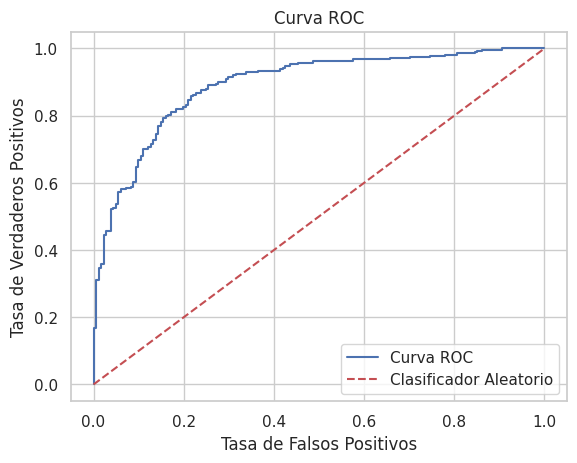

In [794]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=9000000000)
model.fit(X_train, y_train)

# Predecir las etiquetas de salida para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las probabilidades de clase para el conjunto de prueba
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(y_test, y_prob)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Imprimir el área bajo la curva ROC
print("AUC-ROC:", roc_auc)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))

# Graficar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Clasificador Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()



se llevó a cabo una evaluación adicional del modelo de regresión logística utilizando la curva ROC y el área bajo la curva ROC. El AUC-ROC obtenido fue de 0.891, lo que indica un buen rendimiento del modelo en la clasificación de los datos.

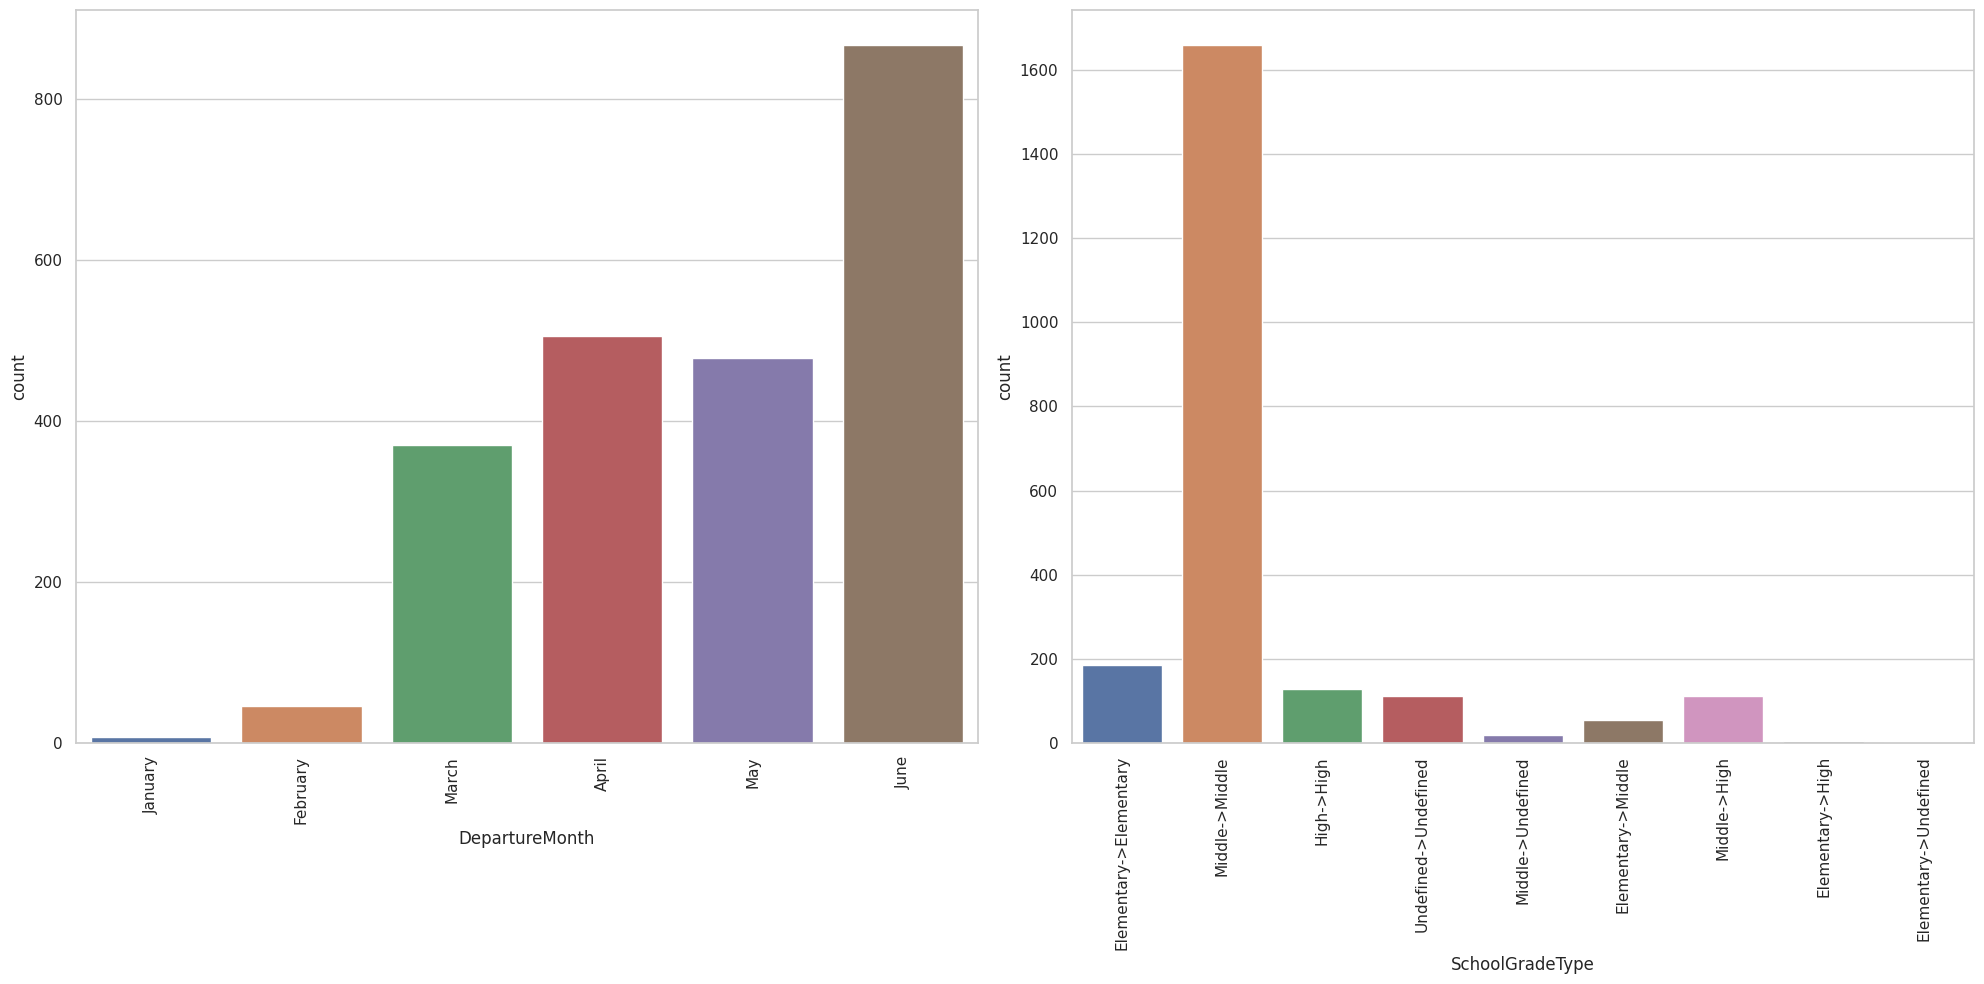

In [795]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_vars = ['DepartureMonth', 'SchoolGradeType']
data_categorical = data81[categorical_vars]

# Crear figuras con subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

# Crear un countplot para cada variable categórica
for i in range(2):
    var = categorical_vars[i]
    sns.countplot(x=var, data=data_categorical, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Ajustar espacio entre subplots
fig.tight_layout()

# Mostrar el plot
plt.show()


In [796]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Preprocesamiento de datos y codificación one-hot
X = pd.get_dummies(data81.drop('Retained.in.2012.', axis=1), prefix='Dummie_')
X['Time_travel1'] = X['Time_travel1'].dt.days  # Convertir la columna a días
y = data81['Retained.in.2012.']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de bosques aleatorios
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.832967032967033
              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78       181
         1.0       0.84      0.89      0.86       274

    accuracy                           0.83       455
   macro avg       0.83      0.82      0.82       455
weighted avg       0.83      0.83      0.83       455



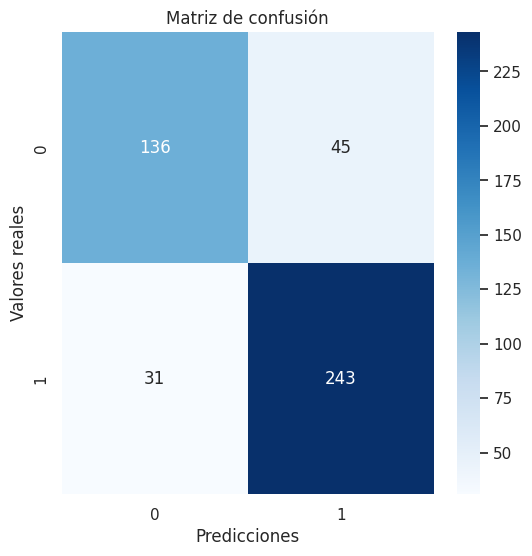

In [797]:


# Gráfico de matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()


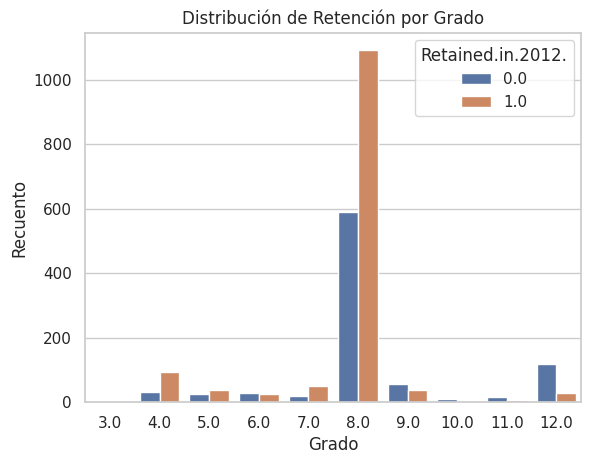

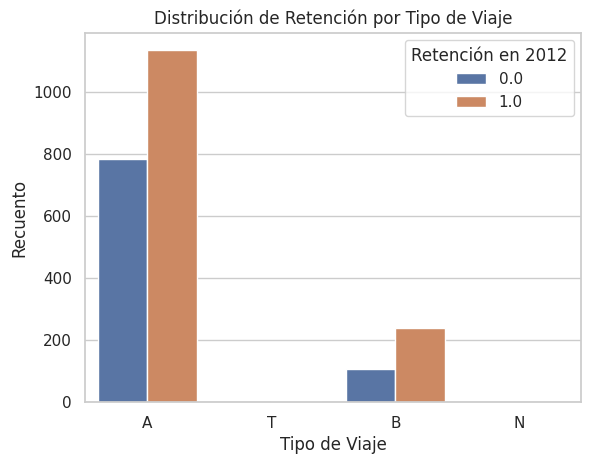

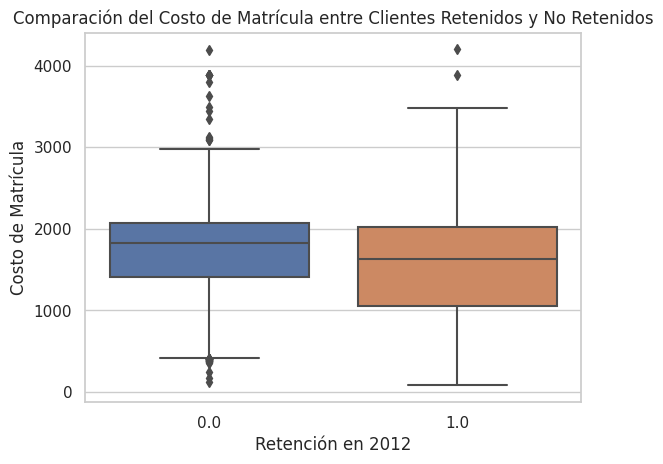

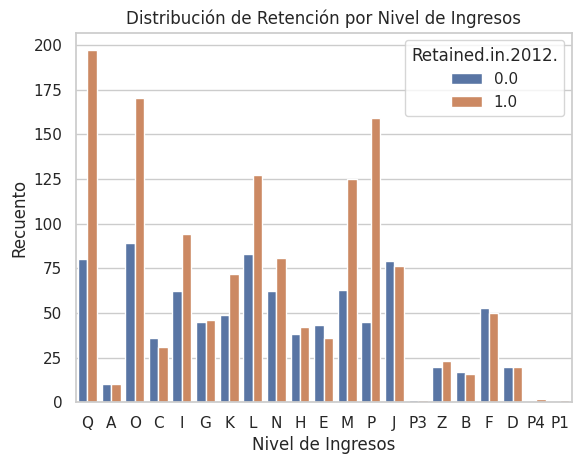

In [798]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para visualizar la distribución de los grados
sns.countplot(x='To.Grade', hue='Retained.in.2012.', data=data81)
plt.xlabel('Grado')
plt.ylabel('Recuento')
plt.title('Distribución de Retención por Grado')
plt.show()

# Gráfico de barras apiladas para comparar el tipo de viaje y la retención
sns.countplot(x='Travel.Type', hue='Retained.in.2012.', data=data81)
plt.xlabel('Tipo de Viaje')
plt.ylabel('Recuento')
plt.title('Distribución de Retención por Tipo de Viaje')
plt.legend(title='Retención en 2012')
plt.show()

# Gráfico de caja para comparar el costo de matrícula entre los clientes retenidos y no retenidos
sns.boxplot(x='Retained.in.2012.', y='Tuition', data=data81)
plt.xlabel('Retención en 2012')
plt.ylabel('Costo de Matrícula')
plt.title('Comparación del Costo de Matrícula entre Clientes Retenidos y No Retenidos')
plt.show()

# Gráfico de barras para visualizar la distribución de los ingresos
sns.countplot(x='Income.Level', hue='Retained.in.2012.', data=data81)
plt.xlabel('Nivel de Ingresos')
plt.ylabel('Recuento')
plt.title('Distribución de Retención por Nivel de Ingresos')
plt.show()


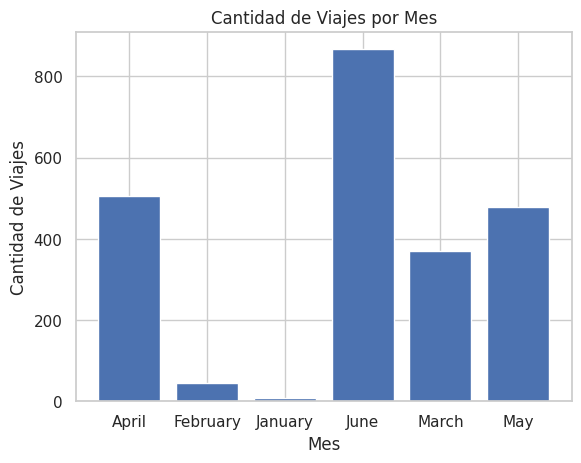

In [799]:
viajes_por_mes = data81['DepartureMonth'].value_counts().sort_index()

# Crear la gráfica de barras
plt.bar(viajes_por_mes.index, viajes_por_mes.values)

# Personalizar la gráfica
plt.title('Cantidad de Viajes por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Viajes')

# Mostrar la gráfica
plt.show()

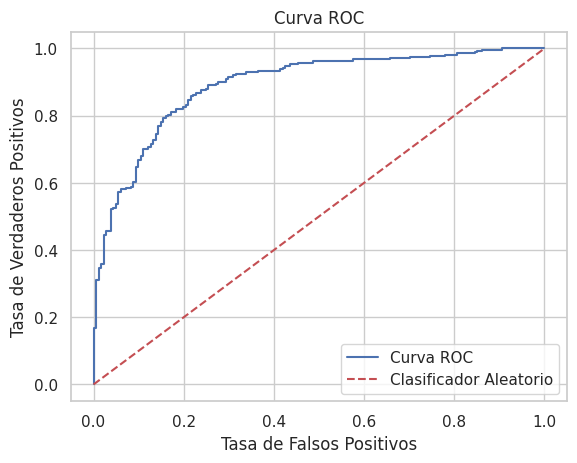

In [800]:
from sklearn.metrics import roc_curve

# Calcular la curva ROC para y_test y y_prob
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Graficar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Clasificador Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


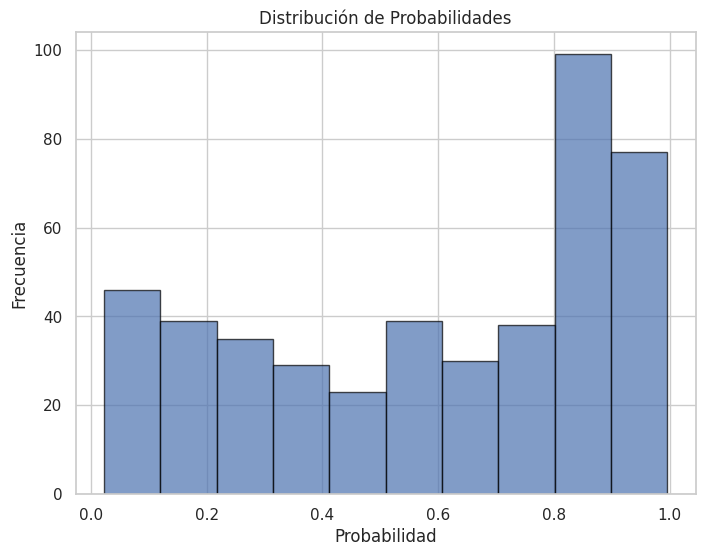

In [801]:
import matplotlib.pyplot as plt

# Crear histograma de las probabilidades
plt.figure(figsize=(8, 6))
plt.hist(y_prob, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Probabilidades')
plt.show()


AUC-ROC: 0.8979916925434529
              precision    recall  f1-score   support

         0.0       0.82      0.73      0.78       181
         1.0       0.84      0.89      0.86       274

    accuracy                           0.83       455
   macro avg       0.83      0.81      0.82       455
weighted avg       0.83      0.83      0.83       455



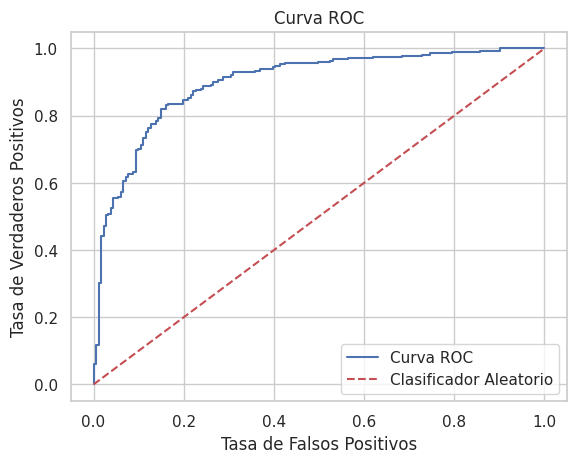

In [802]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=9000000000)
model.fit(X_train, y_train)

# Predecir las etiquetas de salida para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las probabilidades de clase para el conjunto de prueba
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(y_test, y_prob)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Imprimir el área bajo la curva ROC
print("AUC-ROC:", roc_auc)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))

# Graficar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Clasificador Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


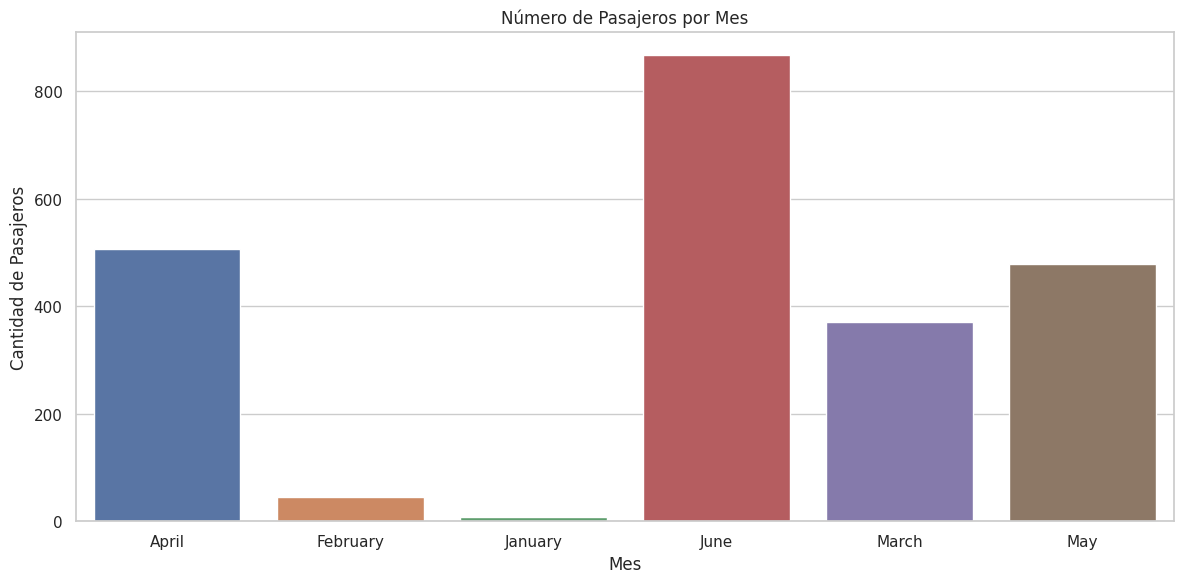

In [803]:
import matplotlib.pyplot as plt
import seaborn as sns

# Los meses con menos pasajeros son en Enero y Febrero
plt.figure(figsize=(12, 6))

# Graficar el número de pasajeros por mes
sns.barplot(data=viajes_mensuales, x="DepartureMonth", y="FPP")

# Personalizar el título y los ejes
plt.title("Número de Pasajeros por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Pasajeros")

# Ajustar el espaciado entre las barras
plt.tight_layout()

# Mostrar el gráfico
plt.show()


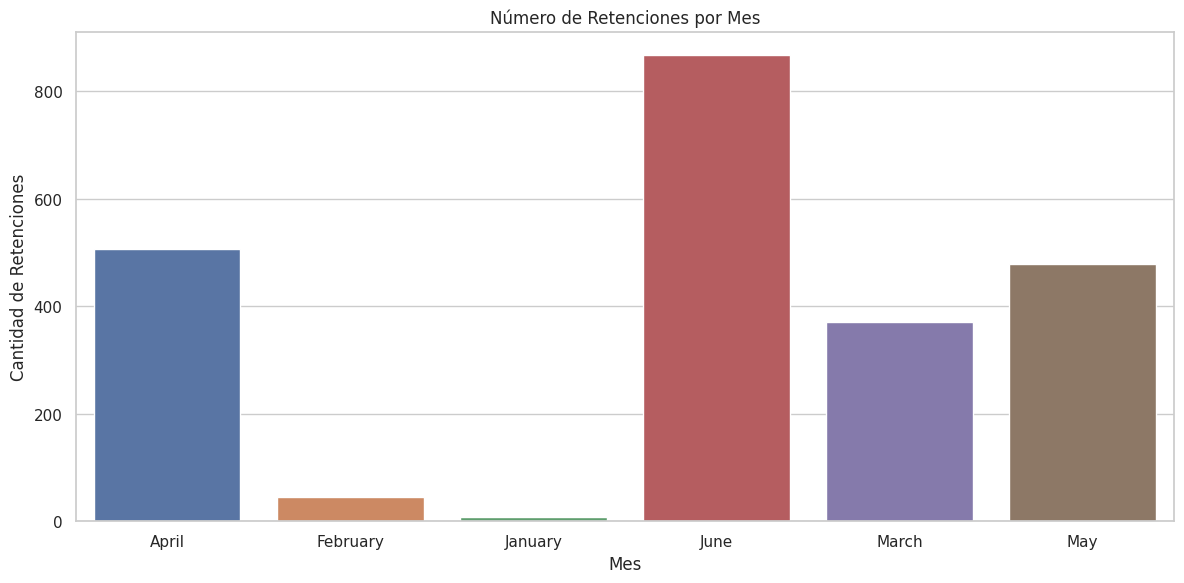

In [804]:
import matplotlib.pyplot as plt
import seaborn as sns

# Los viajes que se realizaron en Junio tuvieron mayor número de retención
plt.figure(figsize=(12, 6))

# Graficar el número de retenciones por mes
sns.barplot(data=viajes_mensuales, x="DepartureMonth", y="Retained.in.2012.")

# Personalizar el título y los ejes
plt.title("Número de Retenciones por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Retenciones")

# Ajustar el espaciado entre las barras
plt.tight_layout()

# Mostrar el gráfico
plt.show()


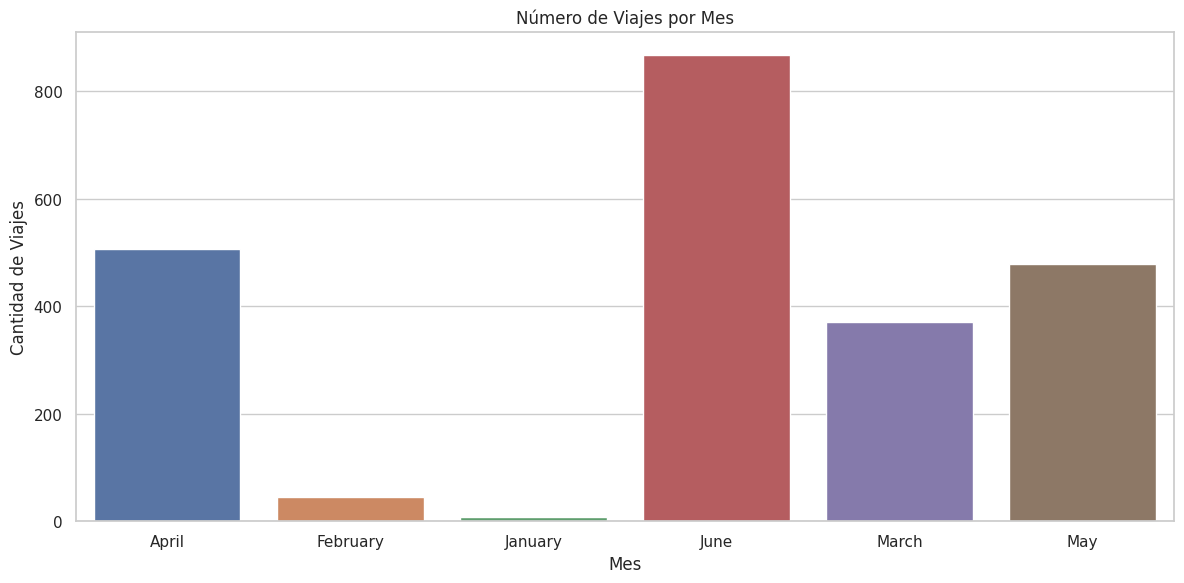

In [805]:
import matplotlib.pyplot as plt
import seaborn as sns

# Viajes por mes
viajes_mensuales = data81.groupby(by="DepartureMonth").count().reset_index()

# Configurar el estilo de gráficos de Seaborn
sns.set(style="whitegrid")

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar el número de viajes por mes
sns.barplot(data=viajes_mensuales, x="DepartureMonth", y="ID", ax=ax)

# Personalizar el título y los ejes
ax.set_title("Número de Viajes por Mes")
ax.set_xlabel("Mes")
ax.set_ylabel("Cantidad de Viajes")

# Ajustar el espaciado entre las barras
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [806]:
departure_month_counts = data81['DepartureMonth'].value_counts().reset_index()
departure_month_counts.columns = ['DepartureMonth', 'Count']
departure_month_counts = departure_month_counts.sort_values('Count', ascending=False)

print(departure_month_counts)


  DepartureMonth  Count
0           June    867
1          April    506
2            May    478
3          March    370
4       February     46
5        January      7


In [807]:
print(data81.shape)

(2274, 22)


In [808]:
print(data81.columns)

Index(['ID', 'To.Grade', 'Is.Non.Annual.', 'Days', 'Travel.Type', 'Tuition',
       'FRP.Active', 'Total.Discount.Pax', 'Region', 'School.Type',
       'MDR.High.Grade', 'Income.Level', 'School.Sponsor', 'SPR.Product.Type',
       'SPR.New.Existing', 'FPP', 'NumberOfMeetingswithParents',
       'SchoolGradeType', 'DepartureMonth', 'SingleGradeTripFlag',
       'Retained.in.2012.', 'Time_travel1'],
      dtype='object')


In [809]:
for columna, tipo in data81.dtypes.iteritems():
    print(f" {columna}, {tipo}")


 ID, object
 To.Grade, float64
 Is.Non.Annual., float64
 Days, float64
 Travel.Type, object
 Tuition, float64
 FRP.Active, float64
 Total.Discount.Pax, float64
 Region, object
 School.Type, object
 MDR.High.Grade, float64
 Income.Level, object
 School.Sponsor, float64
 SPR.Product.Type, object
 SPR.New.Existing, object
 FPP, float64
 NumberOfMeetingswithParents, float64
 SchoolGradeType, object
 DepartureMonth, object
 SingleGradeTripFlag, float64
 Retained.in.2012., float64
 Time_travel1, timedelta64[ns]


# Retention Modeling at Scholastic Travel Company (B)

Los clientes son preguntados "¿Qué tan probable es que recomiende STC a un colega?" y pueden responder en una escala del 1 al 10. Los clientes que responden con 9 o 10 son considerados "promotores" y los que responden con 5 o menos son considerados "detractores". El número de promotores se resta del número de detractores y se obtiene un "puntaje" que representa la proporción de promotores entre los encuestados. La empresa ha estado recopilando respuestas de los clientes a esta pregunta desde 2008 y ahora cuenta con más datos recientes.

El segundo tipo de datos se refiere a la formación de grupos. Bajo el modelo "organizado por el profesor, pagado por los padres" que siguen la mayoría de los grupos, STC monitorea el registro de los padres/estudiantes en su sitio web y, por lo tanto, sabe cuándo cada grupo alcanza un cierto tamaño. Se considera saludable un tamaño de grupo de 20 a 35, y se cree que las escuelas que logran formar grupos de mayor tamaño tienen más probabilidades de retener a los clientes.

In [810]:
url83 = 'https://docs.google.com/spreadsheets/d/1XkVsUmjGqfoy0zKG4J_6NZWCbhnRIC5u/export?format=xlsx'
data83 = pd.read_excel(url83, engine='openpyxl')

In [811]:
data83 = pd.read_excel(url83, sheet_name='Exhibit 1 -- Data', engine='openpyxl')
data83


,ID,NPS 2011,NPS 2010,NPS 2009,NPS 2008,>= 3 FPP Date,>= 10 FPP Date,>= 20 FPP Date,>= 35 FPP Date
0,1,10.0,10.0,10.0,10.0,2010-06-06,2010-06-18,2010-08-17,2010-08-30
1,2,9.0,10.0,10.0,NaN,2009-12-15,2010-01-20,2010-05-31,NaT
2,3,NaN,10.0,10.0,NaN,2010-06-09,2010-06-09,2010-10-26,NaT
3,4,10.0,NaN,10.0,NaN,2011-01-06,2011-01-06,NaT,NaT
4,5,10.0,NaN,10.0,NaN,2010-05-13,2010-05-24,2010-05-27,2010-06-01
...,...,...,...,...,...,...,...,...,...
2387,2389,10.0,9.0,8.0,NaN,2010-09-26,2010-10-04,2010-10-08,NaT
2388,2388,5.0,NaN,NaN,NaN,2010-09-27,2010-12-17,NaT,NaT
2389,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT
2390,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT


### Exploracion

In [812]:
for columna, tipo in data83.dtypes.iteritems():
    print(f" {columna}, {tipo}")

 ID, object
 NPS 2011, float64
 NPS 2010, float64
 NPS 2009, float64
 NPS 2008, float64
 >= 3 FPP Date, datetime64[ns]
 >= 10 FPP Date, datetime64[ns]
 >= 20 FPP Date, datetime64[ns]
 >= 35 FPP Date, datetime64[ns]


In [813]:
print(data83.columns)

Index(['ID', 'NPS 2011', 'NPS 2010', 'NPS 2009', 'NPS 2008', '>= 3 FPP Date',
       '>= 10 FPP Date', '>= 20 FPP Date', '>= 35 FPP Date'],
      dtype='object')


In [814]:
data83 = data83.dropna()

In [815]:
# Calcular la media y la desviación estándar de NPS para cada año
for year in ['NPS 2011', 'NPS 2010', 'NPS 2009', 'NPS 2008']:
    print(f"Media de {year}: {data83[year].mean()}")
    print(f"Desviación estándar de {year}: {data83[year].std()}")

Media de NPS 2011: 9.546125461254613
Desviación estándar de NPS 2011: 1.0906563293015907
Media de NPS 2010: 9.542435424354244
Desviación estándar de NPS 2010: 0.814821026974468
Media de NPS 2009: 9.468634686346864
Desviación estándar de NPS 2009: 0.8377292827858207
Media de NPS 2008: 9.420664206642066
Desviación estándar de NPS 2008: 0.9190258136115986


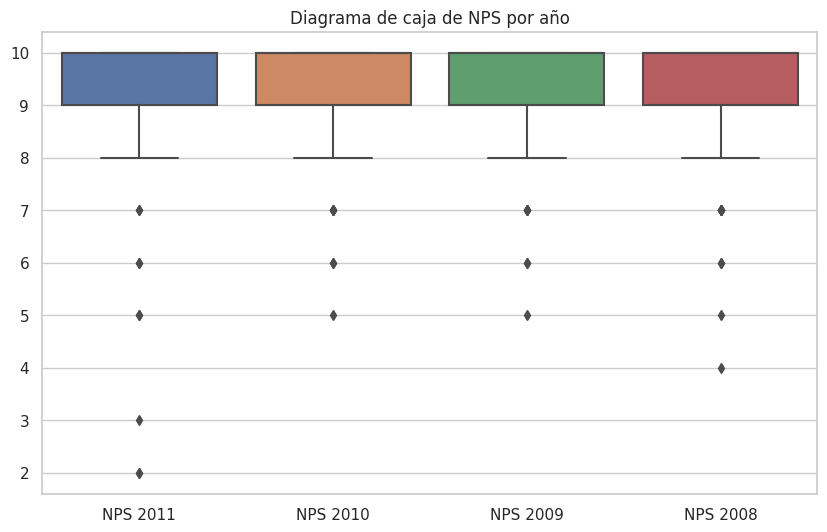

In [816]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data83[['NPS 2011', 'NPS 2010', 'NPS 2009', 'NPS 2008']])
plt.title('Diagrama de caja de NPS por año')
plt.show()

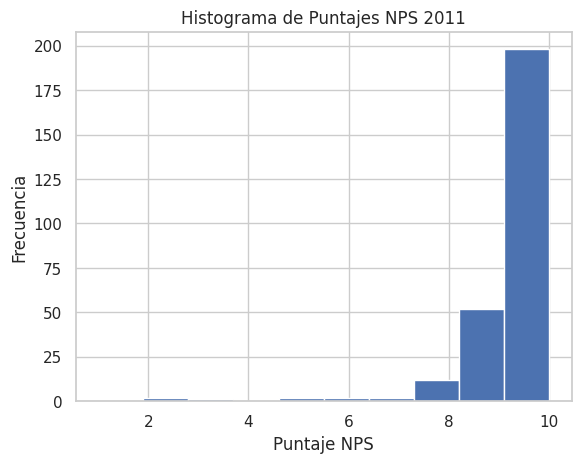

In [817]:
plt.hist(data83['NPS 2011'], bins=10, range=(1, 10))
plt.xlabel('Puntaje NPS')
plt.ylabel('Frecuencia')
plt.title('Histograma de Puntajes NPS 2011')
plt.show()


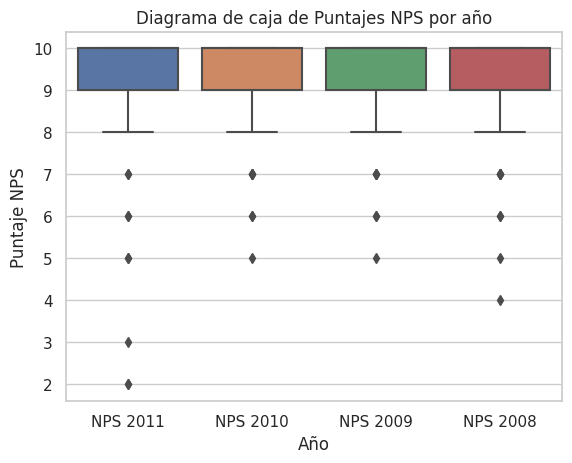

In [818]:
sns.boxplot(data=data83[['NPS 2011', 'NPS 2010', 'NPS 2009', 'NPS 2008']])
plt.xlabel('Año')
plt.ylabel('Puntaje NPS')
plt.title('Diagrama de caja de Puntajes NPS por año')
plt.show()


### Limpieza

In [819]:
# Eliminar filas con valores faltantes
data83 = data83.dropna()

In [820]:
grupo_20_35 = data83['>= 20 FPP Date'] - data83['>= 35 FPP Date']
grupo_20_35_proporcion = grupo_20_35.sum() / len(data83)
print(f"Proporción de grupos de tamaño 20-35: {grupo_20_35_proporcion}")


Proporción de grupos de tamaño 20-35: -40 days +01:19:42.287822878


In [821]:
# Convertir las columnas NPS a números
data83['NPS 2011'] = pd.to_numeric(data83['NPS 2011'], errors='coerce')
data83['NPS 2010'] = pd.to_numeric(data83['NPS 2010'], errors='coerce')
data83['NPS 2009'] = pd.to_numeric(data83['NPS 2009'], errors='coerce')
data83['NPS 2008'] = pd.to_numeric(data83['NPS 2008'], errors='coerce')

In [822]:
# Calcular la métrica NPS para cada año
for year in ['NPS 2011', 'NPS 2010', 'NPS 2009', 'NPS 2008']:
    data83[year] = data83[year].apply(lambda x: 1 if x >= 9 else 0)

In [823]:
# Convertir las fechas de formación de grupos a tamaño de grupo
for col in ['>= 3 FPP Date', '>= 10 FPP Date', '>= 20 FPP Date', '>= 35 FPP Date']:
    data83[col] = pd.to_datetime(data83[col])
    data83[col] = data83[col].apply(lambda x: 0 if pd.isnull(x) else 1)
    data83[col] = data83[col].cumsum()


In [824]:
# Definir la variable objetivo y las variables de entrada
y = data83['NPS 2011']
X = data83.drop(columns=['NPS 2011', 'ID'])

### Algoritmo de regresión logística

In [825]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo y ajustar los datos
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
predictions = model.predict(X_test)

# Evaluar el rendimiento del modelo
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

Accuracy: 0.9454545454545454


In [826]:
# Vamos a predecir 'NPS 2011'
X = data83.drop(columns=['NPS 2011', 'ID'])  # Eliminamos la columna objetivo y 'ID'
y = data83['NPS 2011']  # 'NPS 2011' es nuestro objetivo

# Ahora, puedes dividir tus datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [827]:
from sklearn.model_selection import train_test_split

# Definir la variable objetivo y las variables de entrada
y = data83['NPS 2011']
X = data83.drop(columns=['NPS 2011', 'ID'])  # Elimina las columnas 'NPS 2011' y 'ID' del dataframe.

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Puedes cambiar el random_state y test_size según tus necesidades.

# No necesitamos eliminar ninguna columna de X_train o X_test porque ya eliminamos 'ID' antes de la división.

In [828]:
# Asumo que quieres eliminar las columnas de fechas
X_train = X_train.drop(columns=['>= 3 FPP Date', '>= 10 FPP Date', '>= 20 FPP Date', '>= 35 FPP Date'])
X_test = X_test.drop(columns=['>= 3 FPP Date', '>= 10 FPP Date', '>= 20 FPP Date', '>= 35 FPP Date'])

In [829]:
# Dividimos nuestros datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos una instancia del modelo y ajustamos los datos
model = LogisticRegression(solver='liblinear') # liblinear es bueno para conjuntos de datos pequeños
model.fit(X_train, y_train)

# Hacemos predicciones con nuestro conjunto de prueba
predictions = model.predict(X_test)

# Evaluamos el rendimiento del modelo
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

Accuracy: 0.9454545454545454
